# Importing Libraries

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 729.2/729.2 kB 6.6 MB/s eta 0:00:00


In [ ]:
import torch
from torch.optim import Adam, SGD
from torch import nn, utils
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchmetrics.classification import Accuracy, Precision, Recall

# Gathering and Organizing the data


The dataset used in the "Neural Networks and Deep Learning" by Michale Nielsen was organized as a zip of tuples
each tuple of length 2 represents: as the first element a 2d ndarray with (784, 1) shape, which represents a flattened (28x28) image,
the second element a nd array with (10, 1) which represents the value (the digit represented) of that image input,
the index where the number 1 is placed is the correct output
Given this context, we are not going to use the dataset given in the book, we've chosen to proceed using the mnist dataset from pytorch datasets.


In [ ]:
# Transform PIL image into a tensor. The values are in the range [0, 1]
t = transforms.ToTensor()

# Load datasets for both training and testing.
mnist_training_28 = datasets.MNIST(root='/tmp/mnist', train=True, download=True, transform=t)
mnist_test_28 = datasets.MNIST(root='/tmp/mnist', train=False, download=True, transform=t)

100%|██████████| 9912422/9912422 [00:00<00:00, 78559761.55it/s]


Extracting /tmp/mnist/MNIST/raw/train-images-idx3-ubyte.gz to /tmp/mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 75286323.07it/s]


Extracting /tmp/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /tmp/mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27438460.46it/s]


Extracting /tmp/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /tmp/mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 8897958.32it/s]


Extracting /tmp/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to /tmp/mnist/MNIST/raw



In [ ]:
# Transform PIL image into a tensor. The values are in the range [0, 1]
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load datasets for both training and testing.
mnist_training_224 = datasets.MNIST(root='/tmp/mnist', train=True, download=True, transform=transform)
mnist_test_224 = datasets.MNIST(root='/tmp/mnist', train=False, download=True, transform=transform)

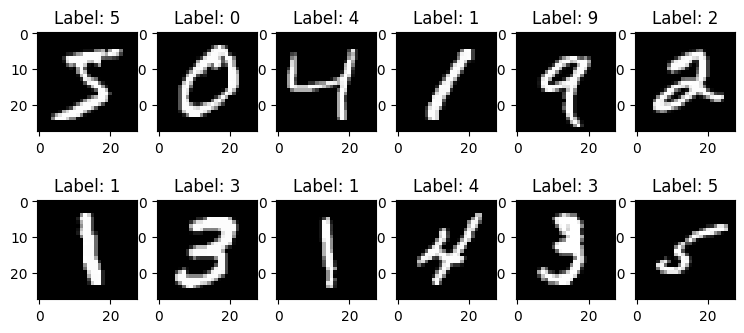

In [ ]:
# Checking the dataset

cols = 6
rows = 2

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(1.5*cols, 2*rows))

for i, ax in enumerate(axes.flatten()):
    image, label = mnist_training_28[i]
    ax.set_title(f"Label: {label}")
    ax.imshow(image.squeeze(0), cmap='gray')  # remove first dimension, hence it its a (1, 28, 28) tensor

plt.show()

# Initial CNN - LeNet

LeNet was one of the first architecture of covolutional neural networks, implemented around the 90's. It consisted in 2 convolutional layers, both followed by a average pooling layer, and 3 fully connected layers after those two convolutional.

In [ ]:
class LeNet(nn.Module):

  def __init__ (self, num_classes):
    super().__init__()
    self.num_classes = num_classes

    self.net = nn.Sequential(
      nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
      nn.AvgPool2d(kernel_size=2, stride=2),
      nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
      nn.AvgPool2d(kernel_size=2, stride=2),
      nn.Flatten(),
      nn.LazyLinear(120), nn.Sigmoid(),
      nn.LazyLinear(84), nn.Sigmoid(),
      nn.LazyLinear(num_classes)
    )

  def forward (self, x):
    return self.net(x)


# LeNet - 2

Implemented the same architechture as LeNetbut added:

- dropout to ensure generalization
- relu to ease training
- maxpooling to extract the features in a more relevant way

In [ ]:
class LeNet_2(nn.Module):

  def __init__ (self, num_classes):
    super().__init__()
    self.num_classes = num_classes

    self.net = nn.Sequential(
      nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
      nn.MaxPool2d(kernel_size=2, stride=2),
      nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
      nn.MaxPool2d(kernel_size=2, stride=2),
      nn.Flatten(),
      nn.LazyLinear(120), nn.Sigmoid(),  nn.Dropout(p=0.5),
      nn.LazyLinear(84), nn.Sigmoid(), nn.Dropout(p=0.5),
      nn.LazyLinear(num_classes)
    )

  def forward (self, x):
    return self.net(x)

# Another architecture - AlexNet


AlexNet was an evolution of LeNet, retaining the idea of multiple convolutional layers followed by fully connected layers. With increased computational capacity, AlexNet deepened and broadened the architecture, allowing timely training. It also introduced the relu activation function, which simplified training deep networks by requiring fewer mathematical operations. Additionally, max pooling was used instead of average pooling, leading to better feature comprehension. The incorporation of dropout, a regularization technique, further reduced overfitting by randomly deactivating neurons based on a probability, ensuring a more generalist model.

In [ ]:
class AlexNet(nn.Module):

  def __init__ (self, num_classes):
    super().__init__()
    self.num_classes = num_classes

    self.net = nn.Sequential(
      nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
      nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
      nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
      nn.MaxPool2d(kernel_size=3, stride=2),
      nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
      nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
      nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
      nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
      nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
      nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
      nn.LazyLinear(num_classes)
    )

  def forward (self, x):
    return self.net(x)

In [ ]:
#tensors shape summarizer function
def layer_summary(net, input_shape):
  X = torch.randn(*input_shape)
  for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

In [ ]:
model = LeNet(10)
layer_summary(model.net, (1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [ ]:
model = AlexNet(10)
layer_summary(model.net, (1, 1, 224, 224))

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

In [ ]:
model = LeNet_2(10)
layer_summary(model.net, (1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
ReLU output shape:	 torch.Size([1, 6, 28, 28])
MaxPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
ReLU output shape:	 torch.Size([1, 16, 10, 10])
MaxPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Dropout output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Dropout output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


### Preparing - LeNet

In [ ]:
#Instance of the model
model_le = LeNet(10)
opt = Adam(model_le.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

# Training with batches of 128 -> lower batch sizes showed many signals of overfitting
batch_size = 128
train_loader = utils.data.DataLoader(mnist_training_28, batch_size=batch_size, shuffle=True)

### Training - LeNet

In [ ]:
losses_le = []

for epoch in range(10): # Number of Epochs
  for imgs, labels in train_loader:
    predictions = model_le(imgs)
    loss = loss_fn(predictions, labels)

    # Backprop
    opt.zero_grad()
    loss.backward()
    opt.step()

    losses_le.append(float(loss))
  print(f"Epoch {epoch}: Loss = {float(loss)}")

Epoch 0: Loss = 0.6755414009094238
Epoch 1: Loss = 0.321869432926178
Epoch 2: Loss = 0.1444074660539627
Epoch 3: Loss = 0.14961175620555878
Epoch 4: Loss = 0.1467123180627823
Epoch 5: Loss = 0.20152981579303741
Epoch 6: Loss = 0.21138495206832886
Epoch 7: Loss = 0.05496571585536003
Epoch 8: Loss = 0.15030650794506073
Epoch 9: Loss = 0.02741936780512333


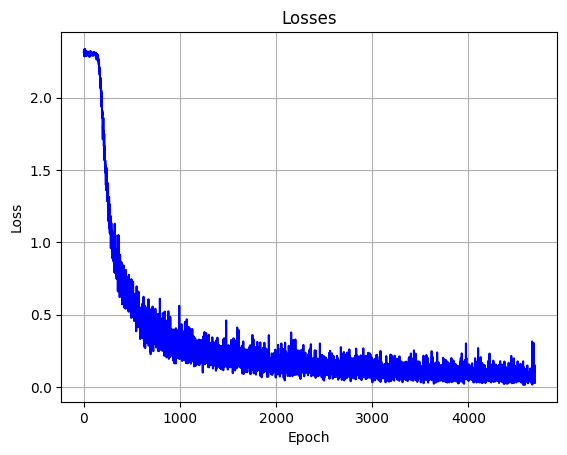

In [ ]:
#Plot losses
plt.plot(losses_le, linestyle='-', color='blue')
plt.title('Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

### Accuracy

In [ ]:
batch_size_test = 10000
test_loader = utils.data.DataLoader(mnist_test_28, batch_size=batch_size_test)

# Image tensor has shape (10000, 1, 28, 28)
imgs, labels = next(iter(test_loader))

# Calculates the results for all the images, returning us a tensor of shape (10000, 10)
# imgs[i][j] => i -> image; j -> the score for that number [0-1]
predictions = model_le(imgs)

# For each row determine the columns with the highest score, the prediction
predicted_classes = torch.argmax(predictions, dim=1)

#Calculate the multiclass accuracy
class_accuracy_metric = Accuracy(task='multiclass', num_classes=10, average=None)
class_accuracy_metric(predicted_classes, labels)
class_accuracy = class_accuracy_metric.compute()

# Calculate the total accuracy
total_accuracy = (predicted_classes == labels).float().mean().item()

print(f"Total Accuracy: {total_accuracy:.4f}")

Total Accuracy: 0.9770


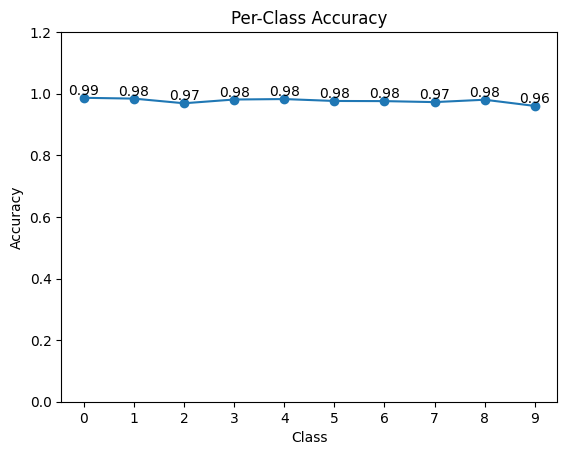

In [ ]:
# Plotting the per-class accuracy
class_indices = range(10)

plt.plot(class_indices, class_accuracy, marker='o')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_accuracy):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()

### Precision
Measures the accuracy of the positive predictions made by the model.

It can be described as: true positives / (true positives + false positives)

In [ ]:
# Calculating the precision for each class
class_precision_metric = Precision(task='multiclass', num_classes=10, average=None)
class_precision_metric(predicted_classes, labels)
class_precision = class_precision_metric.compute()

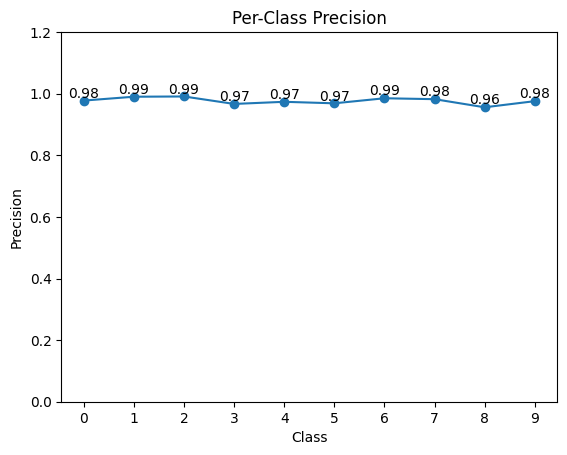

In [ ]:
# Plotting the per-class precision
class_indices = range(10)

plt.plot(class_indices, class_precision, marker='o')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Per-Class Precision')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_precision):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()

### Recall
Measures the ability of the model to predict positive samples correctly

It can be described as: true positives / (true positives + false negatives)

In [ ]:
# Calculating the recall for each class
class_recall_metric = Recall(task='multiclass', num_classes=10, average=None)
class_recall_metric(predicted_classes, labels)
class_recall = class_recall_metric.compute()

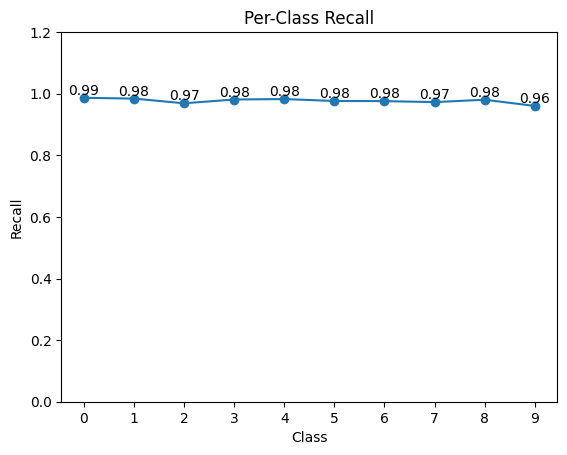

In [ ]:
# Plotting the recall
class_indices = range(10)

plt.plot(class_indices, class_recall, marker='o')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Per-Class Recall')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_recall):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()

### Preparing - LeNet 2

In [ ]:
#Instance of the model
model_le_2 = LeNet_2(10)
opt_2 = Adam(model_le_2.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

# Training with batches of 128 -> lower batch sizes showed many signals of overfitting
batch_size = 128
train_loader_2 = utils.data.DataLoader(mnist_training_28, batch_size=batch_size, shuffle=True)

### Training - LeNet 2

In [ ]:
losses_le_2 = []

for epoch in range(10): # Number of Epochs
  for imgs, labels in train_loader_2:
    predictions = model_le_2(imgs)
    loss = loss_fn(predictions, labels)

    # Backprop
    opt_2.zero_grad()
    loss.backward()
    opt_2.step()

    losses_le_2.append(float(loss))
  print(f"Epoch {epoch}: Loss = {float(loss)}")

Epoch 0: Loss = 0.3817302882671356
Epoch 1: Loss = 0.16076986491680145
Epoch 2: Loss = 0.09237305074930191
Epoch 3: Loss = 0.17085205018520355
Epoch 4: Loss = 0.1800420731306076
Epoch 5: Loss = 0.03793974593281746
Epoch 6: Loss = 0.2681051790714264
Epoch 7: Loss = 0.09893175214529037
Epoch 8: Loss = 0.04455370828509331
Epoch 9: Loss = 0.12370318174362183


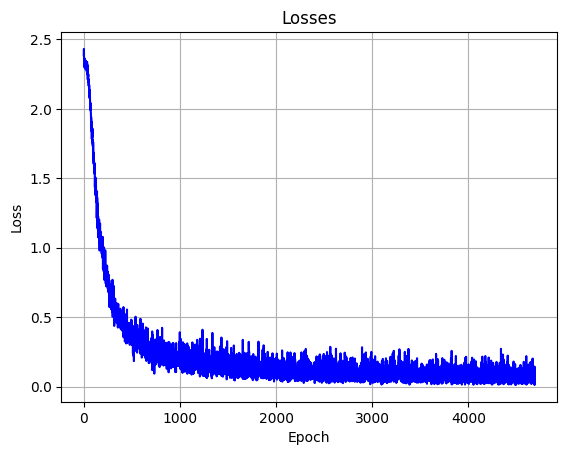

In [ ]:
#Plot losses
plt.plot(losses_le_2, linestyle='-', color='blue')
plt.title('Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

### Accuracy

In [ ]:
batch_size_test = 10000
test_loader = utils.data.DataLoader(mnist_test_28, batch_size=batch_size_test)

# Image tensor has shape (10000, 1, 28, 28)
imgs, labels = next(iter(test_loader))

# Calculates the results for all the images, returning us a tensor of shape (10000, 10)
# imgs[i][j] => i -> image; j -> the score for that number [0-1]
predictions = model_le_2(imgs)

# For each row determine the columns with the highest score, the prediction
predicted_classes = torch.argmax(predictions, dim=1)

#Calculate the multiclass accuracy
class_accuracy_metric = Accuracy(task='multiclass', num_classes=10, average=None)
class_accuracy_metric(predicted_classes, labels)
class_accuracy = class_accuracy_metric.compute()

# Calculate the total accuracy
total_accuracy = (predicted_classes == labels).float().mean().item()

print(f"Total Accuracy: {total_accuracy:.4f}")

Total Accuracy: 0.9781


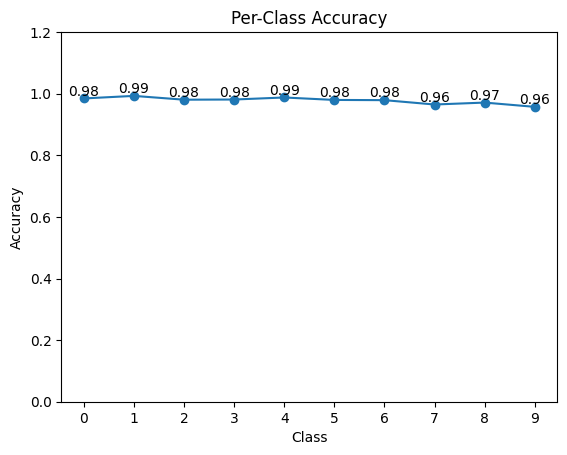

In [ ]:
# Plotting the per-class accuracy
class_indices = range(10)

plt.plot(class_indices, class_accuracy, marker='o')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_accuracy):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()

### Precision

In [ ]:
# Calculating the precision for each class
class_precision_metric = Precision(task='multiclass', num_classes=10, average=None)
class_precision_metric(predicted_classes, labels)
class_precision = class_precision_metric.compute()

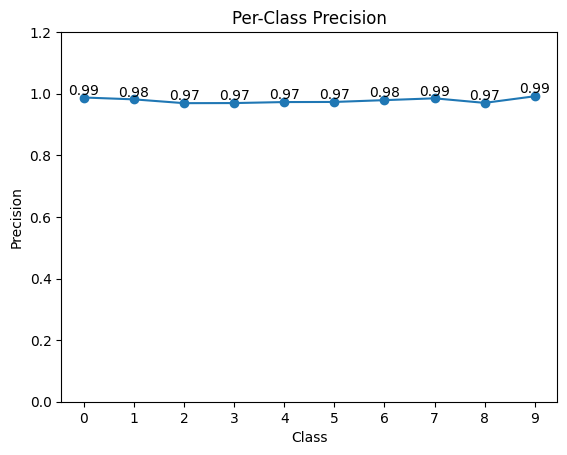

In [ ]:
# Plotting the per-class precision
class_indices = range(10)

plt.plot(class_indices, class_precision, marker='o')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Per-Class Precision')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_precision):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()

### Recall


In [ ]:
# Calculating the recall for each class
class_recall_metric = Recall(task='multiclass', num_classes=10, average=None)
class_recall_metric(predicted_classes, labels)
class_recall = class_recall_metric.compute()

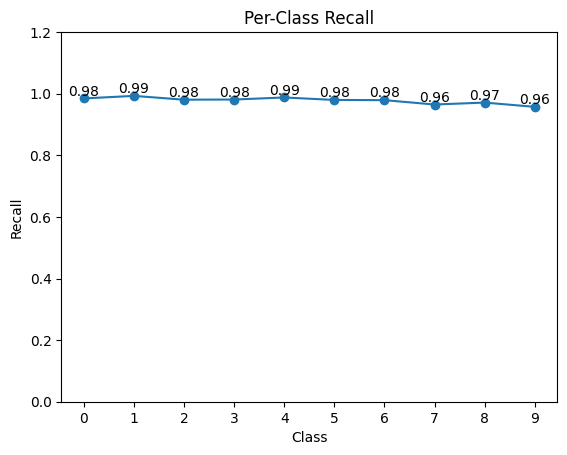

In [ ]:
# Plotting the recall
class_indices = range(10)

plt.plot(class_indices, class_recall, marker='o')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Per-Class Recall')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_recall):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()

### Preparing - AlexNet

In [ ]:
#Instance of the model
model_alex = AlexNet(10);
opt_alex = Adam(model_alex.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

# Training with batches of 128 -> lower batch sizes showed many signals of overfitting
batch_size = 128
train_loader_alex = utils.data.DataLoader(mnist_training_224, batch_size=batch_size, shuffle=True)

### Training - AlexNet

It takes too long to train this network, too much computation and its not worth it

In [ ]:
losses_al = []

for epoch in range(10): # Number of Epochs
  for imgs, labels in train_loader_alex:
    predictions = model_alex(imgs)
    loss = loss_fn(predictions, labels)

    # Backprop
    opt_alex.zero_grad()
    loss.backward()
    opt_alex.step()

    losses_al.append(float(loss))
  print(f"Epoch {epoch}: Loss = {float(loss)}")

KeyboardInterrupt: ignored

In [ ]:
#Plot losses
plt.plot(losses_al, linestyle='-', color='blue')
plt.title('Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

### Accuracy

In [ ]:
print('a')

In [ ]:
batch_size_test = 1000
test_loader_alex = utils.data.DataLoader(mnist_test_224, batch_size=batch_size_test)

# Image tensor has shape (10000, 1, 28, 28)
imgs, labels = next(iter(test_loader_alex))

# Calculates the results for all the images, returning us a tensor of shape (10000, 10)
# imgs[i][j] => i -> image; j -> the score for that number [0-1]
predictions = model_alex(imgs)

# For each row determine the columns with the highest score, the prediction
predicted_classes = torch.argmax(predictions, dim=1)

#Calculate the multiclass accuracy
class_accuracy_metric = Accuracy(task='multiclass', num_classes=10, average=None)
class_accuracy_metric(predicted_classes, labels)
class_accuracy = class_accuracy_metric.compute()

# Calculate the total accuracy
total_accuracy = (predicted_classes == labels).float().mean().item()

print(f"Total Accuracy: {total_accuracy:.4f}")

In [ ]:
# Plotting the per-class accuracy
class_indices = range(10)

plt.plot(class_indices, class_accuracy, marker='o')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_accuracy):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()

### Precision
Measures the accuracy of the positive predictions made by the model.

It can be described as: true positives / (true positives + false positives)

In [ ]:
# Calculating the precision for each class
class_precision_metric = Precision(task='multiclass', num_classes=10, average=None)
class_precision_metric(predicted_classes, labels)
class_precision = class_precision_metric.compute()

In [ ]:
# Plotting the per-class precision
class_indices = range(10)

plt.plot(class_indices, class_precision, marker='o')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Per-Class Precision')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_precision):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()

### Recall
Measures the ability of the model to predict positive samples correctly

It can be described as: true positives / (true positives + false negatives)

In [ ]:
# Calculating the recall for each class
class_recall_metric = Recall(task='multiclass', num_classes=10, average=None)
class_recall_metric(predicted_classes, labels)
class_recall = class_recall_metric.compute()

In [ ]:
# Plotting the recall
class_indices = range(10)

plt.plot(class_indices, class_recall, marker='o')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Per-Class Recall')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_recall):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()

Data Augmentation

Other AlexNet

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from helper_evaluation import set_all_seeds, set_deterministic, compute_confusion_matrix
from helper_train import train_model
from helper_plotting import plot_training_loss, plot_accuracy, show_examples, plot_confusion_matrix
from helper_dataset import get_dataloaders_mnist, UnNormalize


In [ ]:
RANDOM_SEED = 123
BATCH_SIZE = 256
NUM_EPOCHS = 20
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
set_all_seeds(RANDOM_SEED)
#set_deterministic()

In [ ]:
import torchvision.transforms as transforms
import torch.utils.data

train_transforms = transforms.Compose([
    transforms.Resize((70, 70)),
    transforms.RandomCrop((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Grayscale images have only one channel, so use a single value for mean and std.
])

train_data_augmentation_transforms = transforms.Compose([
    transforms.Resize((70, 70)),
    transforms.RandomCrop((64, 64)),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Grayscale images have only one channel, so use a single value for mean and std.
])

test_transforms = transforms.Compose([
    transforms.Resize((70, 70)),
    transforms.CenterCrop((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])



# Assuming you have a function named get_dataloaders_mnist that loads the MNIST dataset.
train_loader_original, valid_loader, test_loader = get_dataloaders_mnist(
    batch_size=BATCH_SIZE,
    validation_fraction=0.1,
    train_transforms=train_transforms,
    test_transforms=test_transforms,
    num_workers=2
)

# Load the augmented dataset with data augmentation transformations
train_augmented, _, _ = get_dataloaders_mnist(
    batch_size=128,
    validation_fraction=0.1,
    train_transforms=train_data_augmentation_transforms,
    test_transforms=test_transforms,
    num_workers=2
)

# Concatenate the original and augmented datasets into a single dataset
combined_dataset = torch.utils.data.ConcatDataset([train_loader_original.dataset, train_augmented.dataset])

# Create a new DataLoader with the combined dataset
train_loader = torch.utils.data.DataLoader(
    dataset=combined_dataset,
    batch_size=BATCH_SIZE,
    num_workers=2,
    shuffle=True  # Shuffle the data during training
)

# Checking the dataset size
print(f"Training dataset size: {len(train_loader.dataset)}")
print(f"Testing dataset size: {len(test_loader.dataset)}")




Training dataset size: 120000
Testing dataset size: 10000


In [ ]:
class AlexNet(torch.nn.Module):

    def __init__(self, num_classes):
        super().__init__()
        self.features = torch.nn.Sequential(
            torch.nn.Conv2d(1, 64, kernel_size=11, stride=4, padding=2),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(64, 192, kernel_size=5, padding=2),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(192, 384, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 256, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(256, 256, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = torch.nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = torch.nn.Sequential(
            torch.nn.Dropout(0.5),
            torch.nn.Linear(256 * 6 * 6, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(4096, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        logits = self.classifier(x)
        return logits


Epoch: 001/020 | Batch 0000/0469 | Loss: 2.3038
Epoch: 001/020 | Batch 0100/0469 | Loss: 2.3008
Epoch: 001/020 | Batch 0200/0469 | Loss: 2.2737
Epoch: 001/020 | Batch 0300/0469 | Loss: 2.3342
Epoch: 001/020 | Batch 0400/0469 | Loss: 2.2013
Epoch: 001/020 | Train: 22.77% | Validation: 21.30%
Time elapsed: 1.76 min
Epoch: 002/020 | Batch 0000/0469 | Loss: 1.8506
Epoch: 002/020 | Batch 0100/0469 | Loss: 0.7855
Epoch: 002/020 | Batch 0200/0469 | Loss: 0.2083
Epoch: 002/020 | Batch 0300/0469 | Loss: 0.1239
Epoch: 002/020 | Batch 0400/0469 | Loss: 0.0715
Epoch: 002/020 | Train: 96.60% | Validation: 97.92%
Time elapsed: 3.52 min
Epoch: 003/020 | Batch 0000/0469 | Loss: 0.0891
Epoch: 003/020 | Batch 0100/0469 | Loss: 0.0879
Epoch: 003/020 | Batch 0200/0469 | Loss: 0.0726
Epoch: 003/020 | Batch 0300/0469 | Loss: 0.0741
Epoch: 003/020 | Batch 0400/0469 | Loss: 0.0588
Epoch: 003/020 | Train: 98.69% | Validation: 99.22%
Time elapsed: 5.27 min
Epoch: 004/020 | Batch 0000/0469 | Loss: 0.0965
Epoch: 

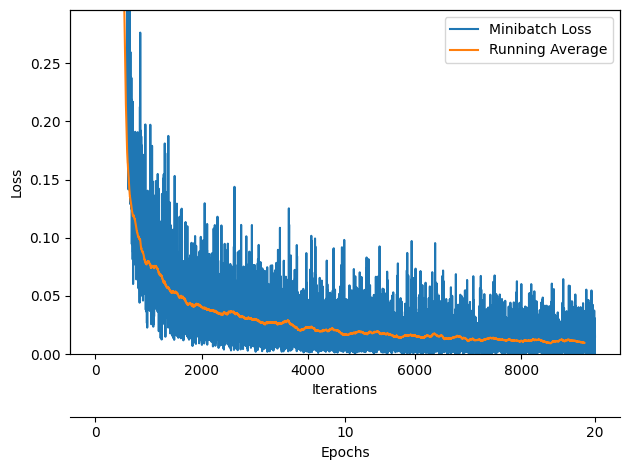

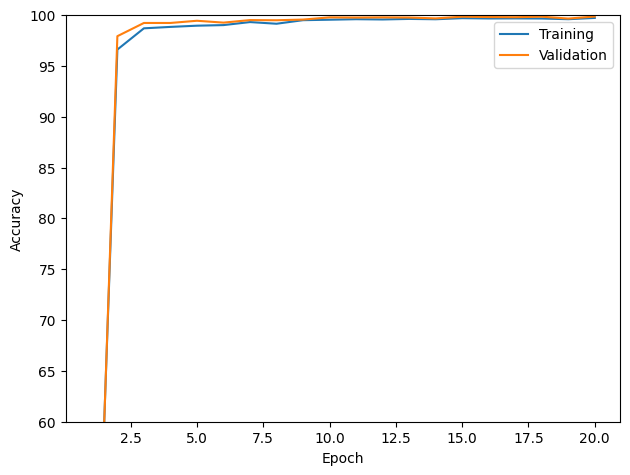

In [ ]:
model = AlexNet(num_classes=10)

model = model.to(DEVICE)


optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    scheduler_on='valid_acc',
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

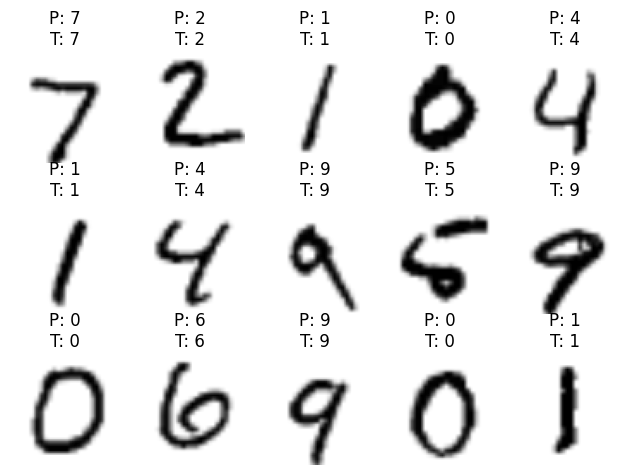

In [ ]:
model.cpu()
unnormalizer = UnNormalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
class_dict = {0: '0',
              1: '1',
              2: '2',
              3: '3',
              4: '4',
              5: '5',
              6: '6',
              7: '7',
              8: '8',
              9: '9'}

show_examples(model=model, data_loader=test_loader, unnormalizer=unnormalizer, class_dict=class_dict)

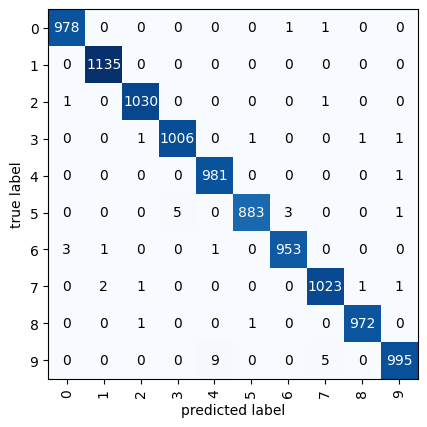

In [ ]:

mat = compute_confusion_matrix(model=model, data_loader=test_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=class_dict.values())
plt.show()



In [ ]:
imgs, labels = next(iter(test_loader))


# Set the model to evaluation mode and move it to the same device as the input tensor

model.to(DEVICE)

# Move the input tensor to the same device as the model
imgs = imgs.to(DEVICE)

# Calculate the predictions using the model on the test data
predictions = model(imgs)

# For each row determine the columns with the highest score, the prediction
predicted_classes = torch.argmax(predictions, dim=1)

# Convert the lists to tensors and move them to the CPU for calculation
predicted_classes = predicted_classes.cpu()
labels = labels.cpu()



Accuracy

Total Accuracy: 0.9961


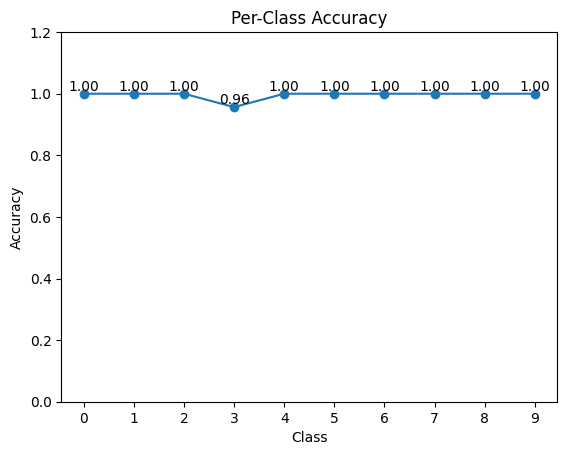

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have mnist_test_28 for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the accuracy for each class using the Accuracy metric from torchmetrics
class_accuracy_metric = torchmetrics.Accuracy(task='multiclass',num_classes=10, average=None)
class_accuracy_metric(predicted_classes, labels)
class_accuracy = class_accuracy_metric.compute()

# Calculate the total accuracy
total_accuracy = (predicted_classes == labels).float().mean().item()

print(f"Total Accuracy: {total_accuracy:.4f}")

# Plotting the per-class accuracy
class_indices = range(10)

plt.plot(class_indices, class_accuracy, marker='o')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_accuracy):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Precision

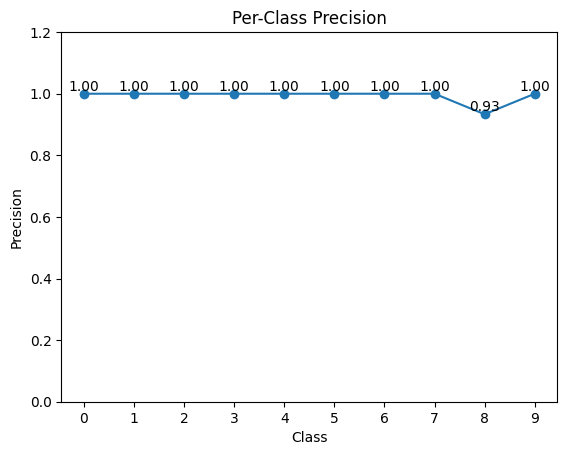

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have test_loader for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the precision for each class using the Precision metric from torchmetrics
class_precision_metric = torchmetrics.Precision(task='multiclass',num_classes=10, average=None)
class_precision_metric(predicted_classes, labels)
class_precision = class_precision_metric.compute()

# Plot the per-class precision
class_indices = range(10)
plt.plot(class_indices, class_precision, marker='o')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Per-Class Precision')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_precision):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Recall

<ipython-input-45-33187ac5e647>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_recall_metric(torch.tensor(predicted_classes), torch.tensor(labels))


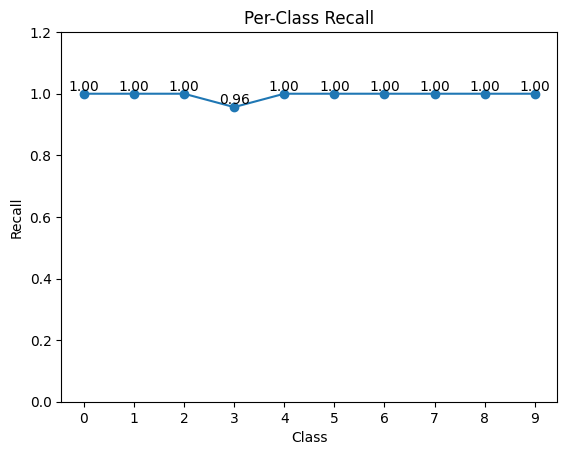

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have test_loader for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the recall for each class using the Recall metric from torchmetrics
class_recall_metric = torchmetrics.Recall(task='multiclass', num_classes=10, average=None)
class_recall_metric(torch.tensor(predicted_classes), torch.tensor(labels))
class_recall = class_recall_metric.compute()

# Plot the per-class recall
class_indices = range(10)
plt.plot(class_indices, class_recall, marker='o')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Per-Class Recall')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_recall):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


LeNet 2

In [ ]:
class LeNet_2(nn.Module):

  def __init__ (self, num_classes):
    super().__init__()
    self.num_classes = num_classes

    self.net = nn.Sequential(
      nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
      nn.MaxPool2d(kernel_size=2, stride=2),
      nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
      nn.MaxPool2d(kernel_size=2, stride=2),
      nn.Flatten(),
      nn.LazyLinear(120), nn.Sigmoid(),  nn.Dropout(p=0.5),
      nn.LazyLinear(84), nn.Sigmoid(), nn.Dropout(p=0.5),
      nn.LazyLinear(num_classes)
    )

  def forward (self, x):
    return self.net(x)

In [ ]:
data_transform = transforms.Compose(
                    [
                      transforms.RandomRotation(15),
                      transforms.ToTensor()
                    ])
mnist_original = datasets.MNIST(root='/tmp/mnist', train=True, download=True, transform=transforms.ToTensor())

# Create augmented dataset by applying data augmentation to the original dataset
mnist_augmented = datasets.MNIST(root='/tmp/mnist', train=True, download=True, transform=data_transform)

# Concatenate the original dataset and augmented dataset
combined_dataset = torch.utils.data.ConcatDataset([mnist_original, mnist_augmented])

# Load datasets for both training and testing using the data augmentation transformations
mnist_training_28 = combined_dataset
mnist_test_28 = datasets.MNIST(root='/tmp/mnist', train=False, download=True, transform=transforms.ToTensor())
print(f"Training dataset size: {len(mnist_training_28)}")
print(f"Testing dataset size: {len(mnist_test_28)}")


100%|██████████| 9912422/9912422 [00:00<00:00, 409193646.36it/s]

Extracting /tmp/mnist/MNIST/raw/train-images-idx3-ubyte.gz to /tmp/mnist/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 28725561.73it/s]


Extracting /tmp/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /tmp/mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 198938309.65it/s]


Extracting /tmp/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /tmp/mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19340638.34it/s]


Extracting /tmp/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to /tmp/mnist/MNIST/raw

Training dataset size: 120000
Testing dataset size: 10000


In [ ]:
#Instance of the model
model_le_2 = LeNet_2(10)
opt_2 = Adam(model_le_2.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

# Training with batches of 128 -> lower batch sizes showed many signals of overfitting
batch_size = 128
train_loader_2 = utils.data.DataLoader(mnist_training_28, batch_size=batch_size, shuffle=True)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [ ]:
losses_le_2 = []

for epoch in range(10): # Number of Epochs
  for imgs, labels in train_loader_2:
    predictions = model_le_2(imgs)
    loss = loss_fn(predictions, labels)

    # Backprop
    opt_2.zero_grad()
    loss.backward()
    opt_2.step()

    losses_le_2.append(float(loss))
  print(f"Epoch {epoch}: Loss = {float(loss)}")

Epoch 0: Loss = 0.17664562165737152
Epoch 1: Loss = 0.1827554851770401
Epoch 2: Loss = 0.16070546209812164
Epoch 3: Loss = 0.05181676894426346
Epoch 4: Loss = 0.13477517664432526
Epoch 5: Loss = 0.05517242103815079
Epoch 6: Loss = 0.1910841464996338
Epoch 7: Loss = 0.10166173428297043
Epoch 8: Loss = 0.08681980520486832
Epoch 9: Loss = 0.02045680582523346


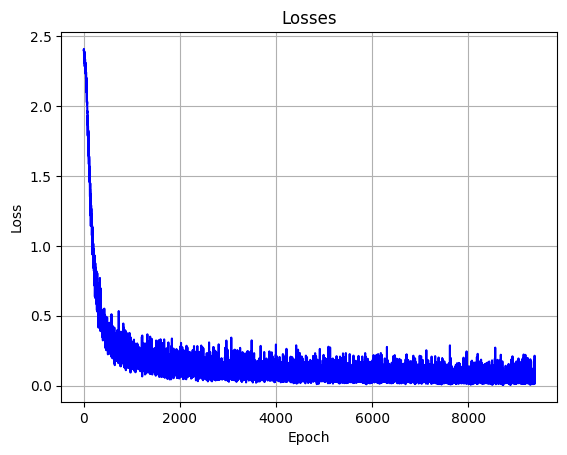

In [ ]:
#Plot losses
plt.plot(losses_le_2, linestyle='-', color='blue')
plt.title('Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

Accuracy

In [ ]:
batch_size_test = 10000
test_loader = utils.data.DataLoader(mnist_test_28, batch_size=batch_size_test)

# Image tensor has shape (10000, 1, 28, 28)
imgs, labels = next(iter(test_loader))

# Calculates the results for all the images, returning us a tensor of shape (10000, 10)
# imgs[i][j] => i -> image; j -> the score for that number [0-1]
predictions = model_le_2(imgs)

# For each row determine the columns with the highest score, the prediction
predicted_classes = torch.argmax(predictions, dim=1)

#Calculate the multiclass accuracy
class_accuracy_metric = Accuracy(task='multiclass', num_classes=10, average=None)
class_accuracy_metric(predicted_classes, labels)
class_accuracy = class_accuracy_metric.compute()

# Calculate the total accuracy
total_accuracy = (predicted_classes == labels).float().mean().item()

print(f"Total Accuracy: {total_accuracy:.4f}")

Total Accuracy: 0.9837


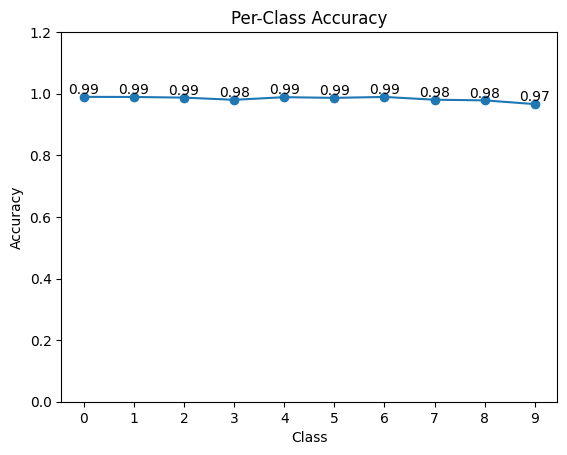

In [ ]:
# Plotting the per-class accuracy
class_indices = range(10)

plt.plot(class_indices, class_accuracy, marker='o')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_accuracy):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()

Precision

In [ ]:
# Calculating the precision for each class
class_precision_metric = Precision(task='multiclass', num_classes=10, average=None)
class_precision_metric(predicted_classes, labels)
class_precision = class_precision_metric.compute()

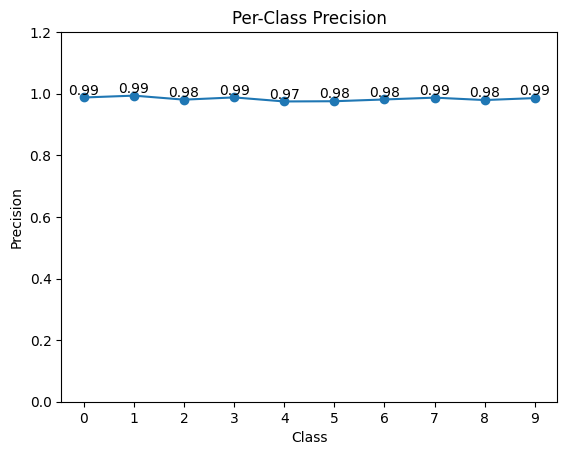

In [ ]:
# Plotting the per-class precision
class_indices = range(10)

plt.plot(class_indices, class_precision, marker='o')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Per-Class Precision')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_precision):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()

Recall

In [ ]:
# Calculating the recall for each class
class_recall_metric = Recall(task='multiclass', num_classes=10, average=None)
class_recall_metric(predicted_classes, labels)
class_recall = class_recall_metric.compute()

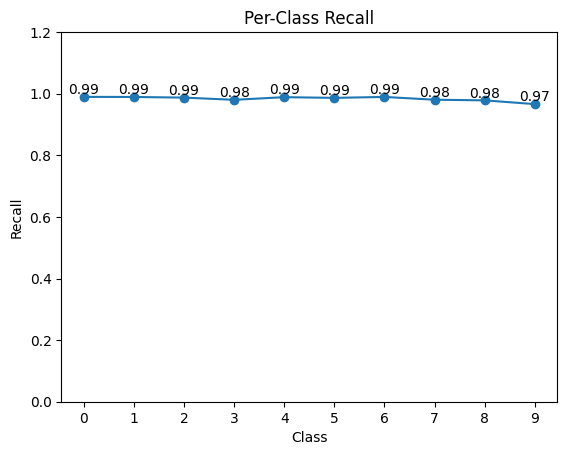

In [ ]:
# Plotting the recall
class_indices = range(10)

plt.plot(class_indices, class_recall, marker='o')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Per-Class Recall')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_recall):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()

Other AlexNet

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from helper_evaluation import set_all_seeds, set_deterministic, compute_confusion_matrix
from helper_train import train_model
from helper_plotting import plot_training_loss, plot_accuracy, show_examples, plot_confusion_matrix
from helper_dataset import get_dataloaders_mnist, UnNormalize


In [ ]:
RANDOM_SEED = 123
BATCH_SIZE = 256
NUM_EPOCHS = 20
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
set_all_seeds(RANDOM_SEED)
#set_deterministic()

In [ ]:
import torchvision.transforms as transforms

train_transforms = transforms.Compose([
    transforms.Resize((70, 70)),
    transforms.RandomCrop((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Grayscale images have only one channel, so use a single value for mean and std.
])

test_transforms = transforms.Compose([
    transforms.Resize((70, 70)),
    transforms.CenterCrop((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Assuming you have a function named get_dataloaders_mnist that loads the MNIST dataset.
train_loader, valid_loader, test_loader = get_dataloaders_mnist(
    batch_size=BATCH_SIZE,
    validation_fraction=0.1,
    train_transforms=train_transforms,
    test_transforms=test_transforms,
    num_workers=2
)


# Checking the dataset
for images, labels in train_loader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Image batch dimensions: torch.Size([256, 1, 64, 64])
Image label dimensions: torch.Size([256])
Class labels of 10 examples: tensor([4, 5, 8, 9, 9, 4, 9, 9, 3, 9])


In [ ]:
class AlexNet(torch.nn.Module):

    def __init__(self, num_classes):
        super().__init__()
        self.features = torch.nn.Sequential(
            torch.nn.Conv2d(1, 64, kernel_size=11, stride=4, padding=2),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(64, 192, kernel_size=5, padding=2),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(192, 384, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 256, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(256, 256, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = torch.nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = torch.nn.Sequential(
            torch.nn.Dropout(0.5),
            torch.nn.Linear(256 * 6 * 6, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(4096, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        logits = self.classifier(x)
        return logits


Epoch: 001/020 | Batch 0000/0210 | Loss: 2.3024
Epoch: 001/020 | Batch 0100/0210 | Loss: 2.2956
Epoch: 001/020 | Batch 0200/0210 | Loss: 2.2969
Epoch: 001/020 | Train: 20.87% | Validation: 20.55%
Time elapsed: 1.81 min
Epoch: 002/020 | Batch 0000/0210 | Loss: 2.2794
Epoch: 002/020 | Batch 0100/0210 | Loss: 1.5256
Epoch: 002/020 | Batch 0200/0210 | Loss: 0.3388
Epoch: 002/020 | Train: 89.29% | Validation: 91.78%
Time elapsed: 3.41 min
Epoch: 003/020 | Batch 0000/0210 | Loss: 0.2457
Epoch: 003/020 | Batch 0100/0210 | Loss: 0.1426
Epoch: 003/020 | Batch 0200/0210 | Loss: 0.1092
Epoch: 003/020 | Train: 97.12% | Validation: 97.78%
Time elapsed: 5.03 min
Epoch: 004/020 | Batch 0000/0210 | Loss: 0.0662
Epoch: 004/020 | Batch 0100/0210 | Loss: 0.1123
Epoch: 004/020 | Batch 0200/0210 | Loss: 0.0811
Epoch: 004/020 | Train: 98.61% | Validation: 98.97%
Time elapsed: 6.61 min
Epoch: 005/020 | Batch 0000/0210 | Loss: 0.0401
Epoch: 005/020 | Batch 0100/0210 | Loss: 0.0481
Epoch: 005/020 | Batch 0200/

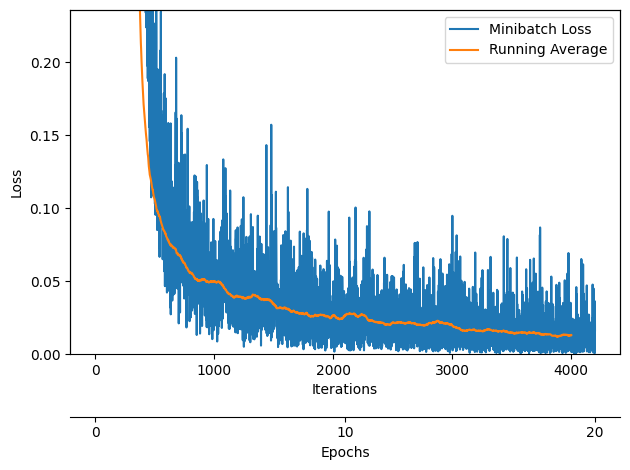

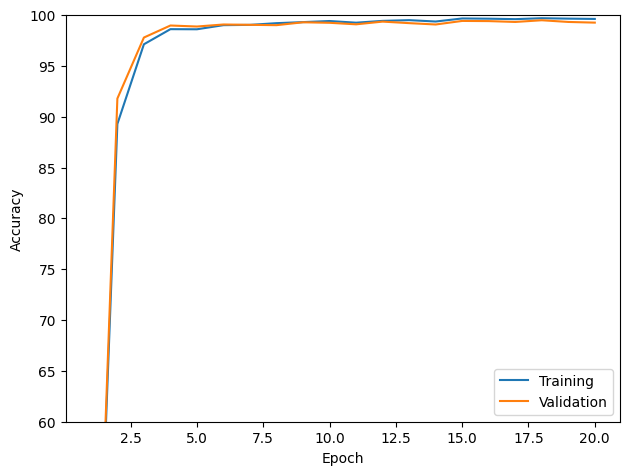

In [ ]:
model = AlexNet(num_classes=10)

model = model.to(DEVICE)


optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    scheduler_on='valid_acc',
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

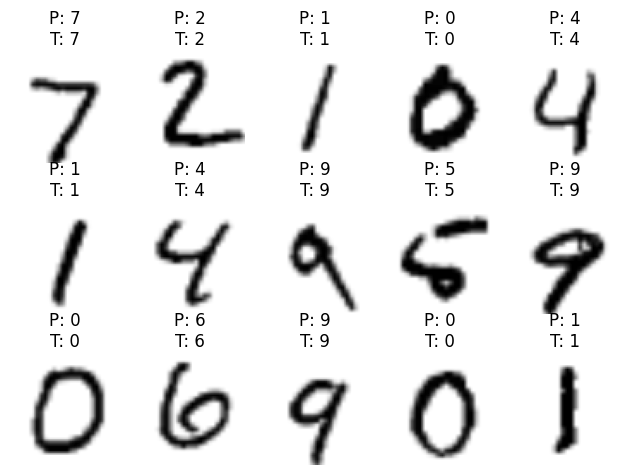

In [ ]:
model.cpu()
unnormalizer = UnNormalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
class_dict = {0: '0',
              1: '1',
              2: '2',
              3: '3',
              4: '4',
              5: '5',
              6: '6',
              7: '7',
              8: '8',
              9: '9'}

show_examples(model=model, data_loader=test_loader, unnormalizer=unnormalizer, class_dict=class_dict)

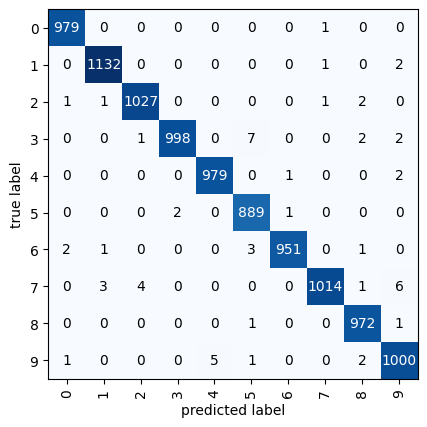

In [ ]:

mat = compute_confusion_matrix(model=model, data_loader=test_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=class_dict.values())
plt.show()



In [ ]:
imgs, labels = next(iter(test_loader))


# Set the model to evaluation mode and move it to the same device as the input tensor

model.to(DEVICE)

# Move the input tensor to the same device as the model
imgs = imgs.to(DEVICE)

# Calculate the predictions using the model on the test data
predictions = model(imgs)

# For each row determine the columns with the highest score, the prediction
predicted_classes = torch.argmax(predictions, dim=1)

# Convert the lists to tensors and move them to the CPU for calculation
predicted_classes = predicted_classes.cpu()
labels = labels.cpu()



Accuracy

Total Accuracy: 0.9961


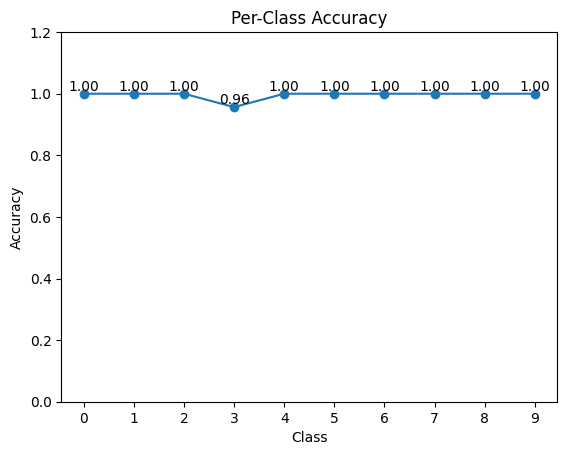

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have mnist_test_28 for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the accuracy for each class using the Accuracy metric from torchmetrics
class_accuracy_metric = torchmetrics.Accuracy(task='multiclass',num_classes=10, average=None)
class_accuracy_metric(predicted_classes, labels)
class_accuracy = class_accuracy_metric.compute()

# Calculate the total accuracy
total_accuracy = (predicted_classes == labels).float().mean().item()

print(f"Total Accuracy: {total_accuracy:.4f}")

# Plotting the per-class accuracy
class_indices = range(10)

plt.plot(class_indices, class_accuracy, marker='o')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_accuracy):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Precision

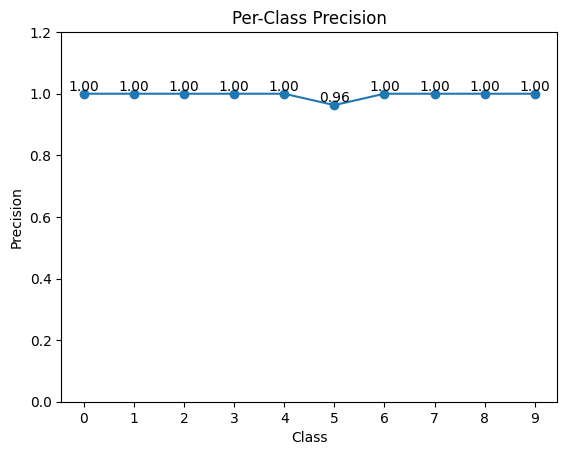

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have test_loader for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the precision for each class using the Precision metric from torchmetrics
class_precision_metric = torchmetrics.Precision(task='multiclass',num_classes=10, average=None)
class_precision_metric(predicted_classes, labels)
class_precision = class_precision_metric.compute()

# Plot the per-class precision
class_indices = range(10)
plt.plot(class_indices, class_precision, marker='o')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Per-Class Precision')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_precision):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Recall

<ipython-input-66-33187ac5e647>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_recall_metric(torch.tensor(predicted_classes), torch.tensor(labels))


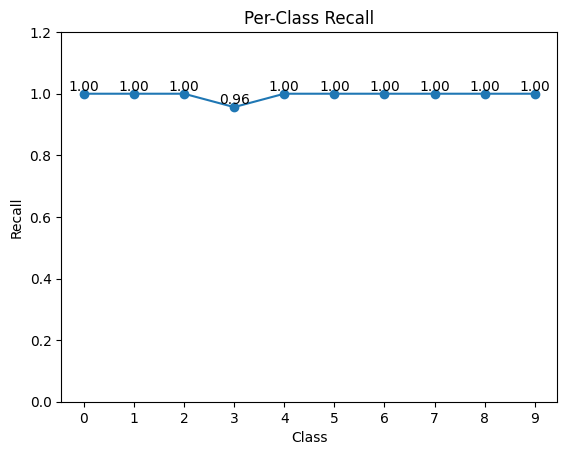

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have test_loader for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the recall for each class using the Recall metric from torchmetrics
class_recall_metric = torchmetrics.Recall(task='multiclass', num_classes=10, average=None)
class_recall_metric(torch.tensor(predicted_classes), torch.tensor(labels))
class_recall = class_recall_metric.compute()

# Plot the per-class recall
class_indices = range(10)
plt.plot(class_indices, class_recall, marker='o')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Per-Class Recall')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_recall):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Another AlexNet with different kernel sizes

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from helper_evaluation import set_all_seeds, set_deterministic, compute_confusion_matrix
from helper_train import train_model
from helper_plotting import plot_training_loss, plot_accuracy, show_examples, plot_confusion_matrix
from helper_dataset import get_dataloaders_mnist, UnNormalize

In [ ]:
RANDOM_SEED = 123
BATCH_SIZE = 256
NUM_EPOCHS = 20
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
set_all_seeds(RANDOM_SEED)
#set_deterministic()

In [ ]:
import torchvision.transforms as transforms

train_transforms = transforms.Compose([
    transforms.Resize((70, 70)),
    transforms.RandomCrop((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Grayscale images have only one channel, so use a single value for mean and std.
])

test_transforms = transforms.Compose([
    transforms.Resize((70, 70)),
    transforms.CenterCrop((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Assuming you have a function named get_dataloaders_mnist that loads the MNIST dataset.
train_loader, valid_loader, test_loader = get_dataloaders_mnist(
    batch_size=BATCH_SIZE,
    validation_fraction=0.1,
    train_transforms=train_transforms,
    test_transforms=test_transforms,
    num_workers=2
)


# Checking the dataset
for images, labels in train_loader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

100%|██████████| 9912422/9912422 [00:00<00:00, 317893575.29it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 118181164.71it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 140472678.83it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3089107.96it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Image batch dimensions: torch.Size([256, 1, 64, 64])
Image label dimensions: torch.Size([256])
Class labels of 10 examples: tensor([4, 5, 8, 9, 9, 4, 9, 9, 3, 9])


Plus 3

In [ ]:
class AlexNet(torch.nn.Module):

    def __init__(self, num_classes):
        super().__init__()
        self.features = torch.nn.Sequential(
            torch.nn.Conv2d(1, 64, kernel_size=14, stride=4, padding=5), #increased the padding and kernel adding 3
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(64, 192, kernel_size=8, padding=5),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(192, 384, kernel_size=6, padding=4),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 256, kernel_size=6, padding=4),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(256, 256, kernel_size=6, padding=4),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = torch.nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = torch.nn.Sequential(
            torch.nn.Dropout(0.5),
            torch.nn.Linear(256 * 6 * 6, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(4096, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        logits = self.classifier(x)
        return logits


Epoch: 001/020 | Batch 0000/0210 | Loss: 2.3031
Epoch: 001/020 | Batch 0100/0210 | Loss: 2.2968
Epoch: 001/020 | Batch 0200/0210 | Loss: 2.2990
Epoch: 001/020 | Train: 11.32% | Validation: 10.50%
Time elapsed: 2.61 min
Epoch: 002/020 | Batch 0000/0210 | Loss: 2.2982
Epoch: 002/020 | Batch 0100/0210 | Loss: 2.2874
Epoch: 002/020 | Batch 0200/0210 | Loss: 2.2300
Epoch: 002/020 | Train: 20.44% | Validation: 20.65%
Time elapsed: 5.20 min
Epoch: 003/020 | Batch 0000/0210 | Loss: 2.1712
Epoch: 003/020 | Batch 0100/0210 | Loss: 0.8815
Epoch: 003/020 | Batch 0200/0210 | Loss: 0.1415
Epoch: 003/020 | Train: 94.43% | Validation: 96.15%
Time elapsed: 7.77 min
Epoch: 004/020 | Batch 0000/0210 | Loss: 0.1407
Epoch: 004/020 | Batch 0100/0210 | Loss: 0.1005
Epoch: 004/020 | Batch 0200/0210 | Loss: 0.0661
Epoch: 004/020 | Train: 97.25% | Validation: 98.17%
Time elapsed: 10.33 min
Epoch: 005/020 | Batch 0000/0210 | Loss: 0.0802
Epoch: 005/020 | Batch 0100/0210 | Loss: 0.0606
Epoch: 005/020 | Batch 0200

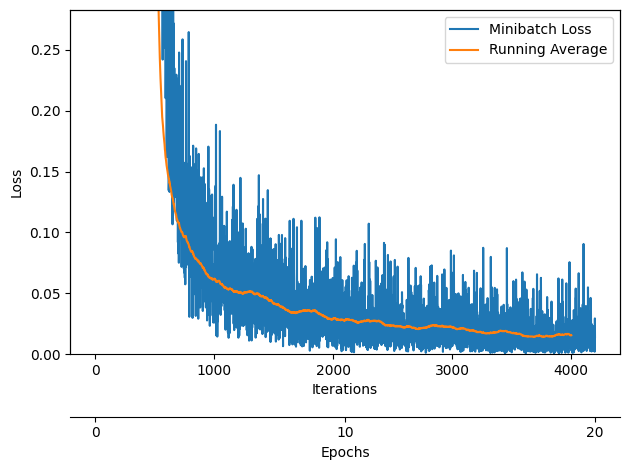

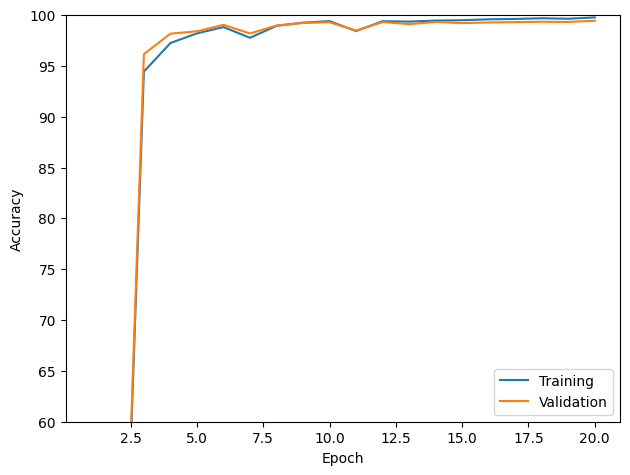

In [ ]:
model = AlexNet(num_classes=10)

model = model.to(DEVICE)


optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    scheduler_on='valid_acc',
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

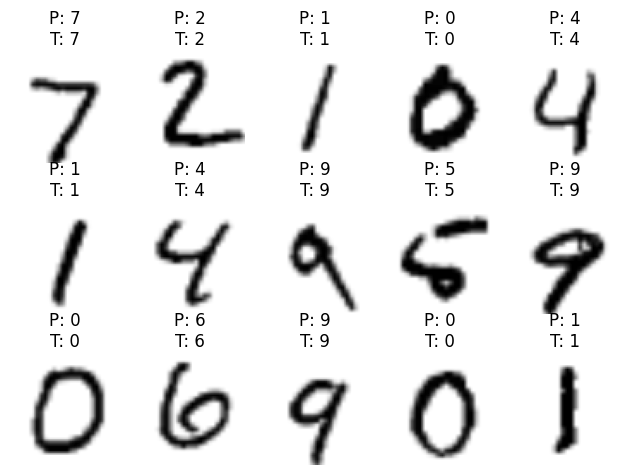

In [ ]:
model.cpu()
unnormalizer = UnNormalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
class_dict = {0: '0',
              1: '1',
              2: '2',
              3: '3',
              4: '4',
              5: '5',
              6: '6',
              7: '7',
              8: '8',
              9: '9'}

show_examples(model=model, data_loader=test_loader, unnormalizer=unnormalizer, class_dict=class_dict)

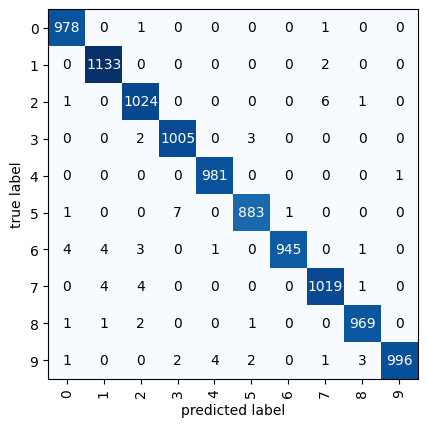

In [ ]:

mat = compute_confusion_matrix(model=model, data_loader=test_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=class_dict.values())
plt.show()



In [ ]:
imgs, labels = next(iter(test_loader))


# Set the model to evaluation mode and move it to the same device as the input tensor

model.to(DEVICE)

# Move the input tensor to the same device as the model
imgs = imgs.to(DEVICE)

# Calculate the predictions using the model on the test data
predictions = model(imgs)

# For each row determine the columns with the highest score, the prediction
predicted_classes = torch.argmax(predictions, dim=1)

# Convert the lists to tensors and move them to the CPU for calculation
predicted_classes = predicted_classes.cpu()
labels = labels.cpu()



Accuracy

Total Accuracy: 0.9961


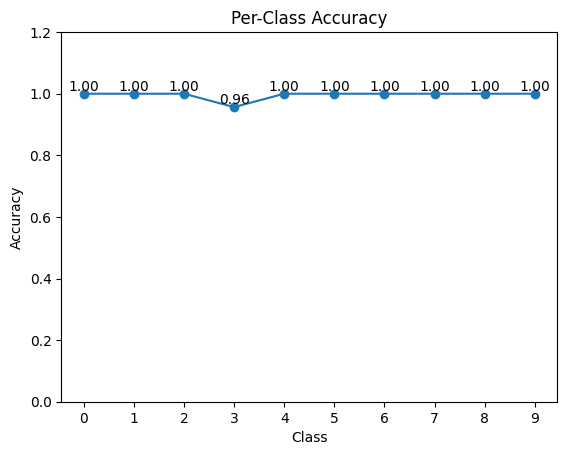

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have mnist_test_28 for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the accuracy for each class using the Accuracy metric from torchmetrics
class_accuracy_metric = torchmetrics.Accuracy(task='multiclass',num_classes=10, average=None)
class_accuracy_metric(predicted_classes, labels)
class_accuracy = class_accuracy_metric.compute()

# Calculate the total accuracy
total_accuracy = (predicted_classes == labels).float().mean().item()

print(f"Total Accuracy: {total_accuracy:.4f}")

# Plotting the per-class accuracy
class_indices = range(10)

plt.plot(class_indices, class_accuracy, marker='o')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_accuracy):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Precision

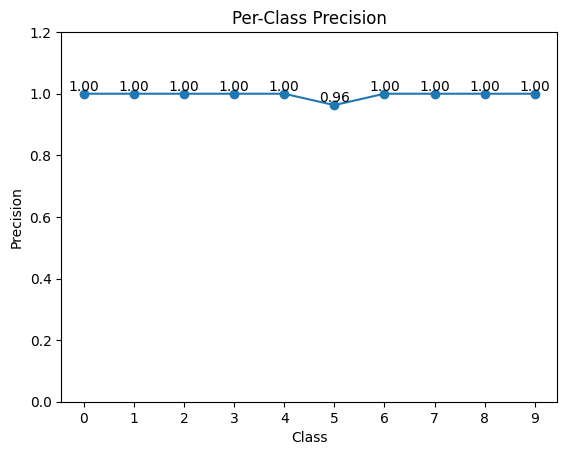

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have test_loader for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the precision for each class using the Precision metric from torchmetrics
class_precision_metric = torchmetrics.Precision(task='multiclass',num_classes=10, average=None)
class_precision_metric(predicted_classes, labels)
class_precision = class_precision_metric.compute()

# Plot the per-class precision
class_indices = range(10)
plt.plot(class_indices, class_precision, marker='o')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Per-Class Precision')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_precision):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Recall

<ipython-input-78-33187ac5e647>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_recall_metric(torch.tensor(predicted_classes), torch.tensor(labels))


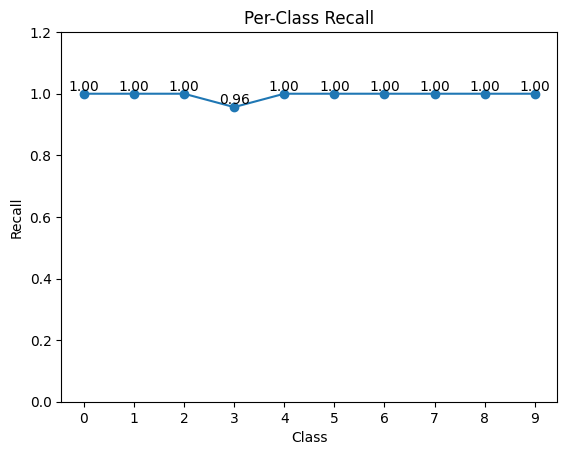

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have test_loader for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the recall for each class using the Recall metric from torchmetrics
class_recall_metric = torchmetrics.Recall(task='multiclass', num_classes=10, average=None)
class_recall_metric(torch.tensor(predicted_classes), torch.tensor(labels))
class_recall = class_recall_metric.compute()

# Plot the per-class recall
class_indices = range(10)
plt.plot(class_indices, class_recall, marker='o')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Per-Class Recall')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_recall):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Plus 6

In [ ]:
class AlexNet(torch.nn.Module):

    def __init__(self, num_classes):
        super().__init__()
        self.features = torch.nn.Sequential(
            torch.nn.Conv2d(1, 64, kernel_size=17, stride=4, padding=8),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(64, 192, kernel_size=11, padding=7),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(192, 384, kernel_size=8, padding=6),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 256, kernel_size=8, padding=6),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(256, 256, kernel_size=8, padding=6),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = torch.nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = torch.nn.Sequential(
            torch.nn.Dropout(0.5),
            torch.nn.Linear(256 * 6 * 6, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(4096, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        logits = self.classifier(x)
        return logits


Epoch: 001/020 | Batch 0000/0210 | Loss: 2.3018
Epoch: 001/020 | Batch 0100/0210 | Loss: 2.3032
Epoch: 001/020 | Batch 0200/0210 | Loss: 2.3034
Epoch: 001/020 | Train: 11.31% | Validation: 10.50%
Time elapsed: 4.67 min
Epoch: 002/020 | Batch 0000/0210 | Loss: 2.2968
Epoch: 002/020 | Batch 0100/0210 | Loss: 2.3008
Epoch: 002/020 | Batch 0200/0210 | Loss: 2.2702
Epoch: 002/020 | Train: 19.42% | Validation: 19.23%
Time elapsed: 9.35 min
Epoch: 003/020 | Batch 0000/0210 | Loss: 2.2404
Epoch: 003/020 | Batch 0100/0210 | Loss: 2.0215
Epoch: 003/020 | Batch 0200/0210 | Loss: 1.2434
Epoch: 003/020 | Train: 47.86% | Validation: 47.37%
Time elapsed: 13.97 min
Epoch: 004/020 | Batch 0000/0210 | Loss: 1.1953
Epoch: 004/020 | Batch 0100/0210 | Loss: 0.1484
Epoch: 004/020 | Batch 0200/0210 | Loss: 0.1138
Epoch: 004/020 | Train: 96.98% | Validation: 97.95%
Time elapsed: 18.56 min
Epoch: 005/020 | Batch 0000/0210 | Loss: 0.0669
Epoch: 005/020 | Batch 0100/0210 | Loss: 0.0693
Epoch: 005/020 | Batch 020

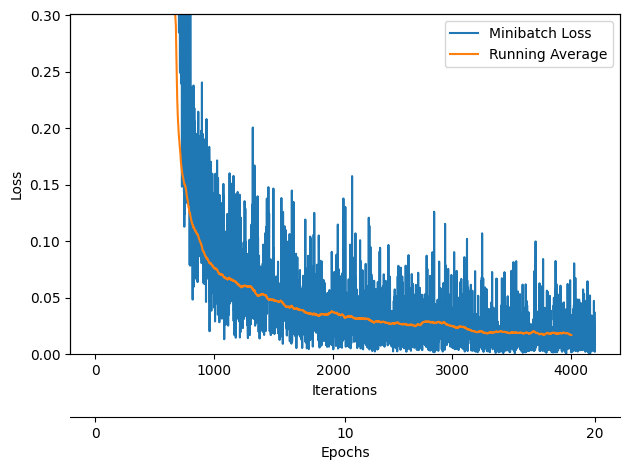

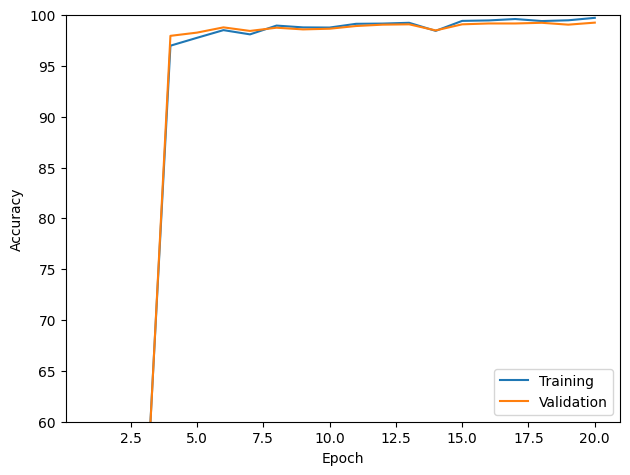

In [ ]:
model = AlexNet(num_classes=10)

model = model.to(DEVICE)


optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    scheduler_on='valid_acc',
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

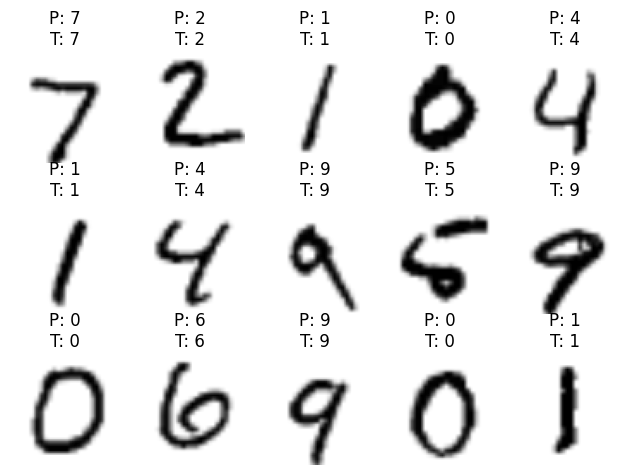

In [ ]:
model.cpu()
unnormalizer = UnNormalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
class_dict = {0: '0',
              1: '1',
              2: '2',
              3: '3',
              4: '4',
              5: '5',
              6: '6',
              7: '7',
              8: '8',
              9: '9'}

show_examples(model=model, data_loader=test_loader, unnormalizer=unnormalizer, class_dict=class_dict)

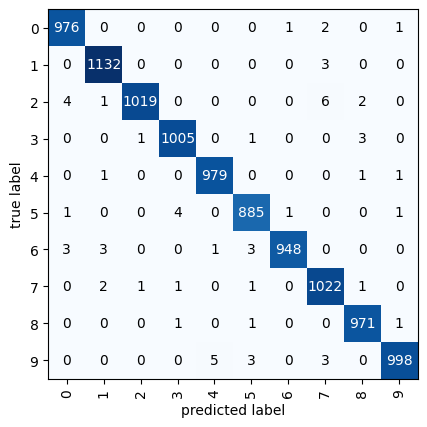

In [ ]:

mat = compute_confusion_matrix(model=model, data_loader=test_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=class_dict.values())
plt.show()



In [ ]:
imgs, labels = next(iter(test_loader))


# Set the model to evaluation mode and move it to the same device as the input tensor

model.to(DEVICE)

# Move the input tensor to the same device as the model
imgs = imgs.to(DEVICE)

# Calculate the predictions using the model on the test data
predictions = model(imgs)

# For each row determine the columns with the highest score, the prediction
predicted_classes = torch.argmax(predictions, dim=1)

# Convert the lists to tensors and move them to the CPU for calculation
predicted_classes = predicted_classes.cpu()
labels = labels.cpu()



Accuracy

Total Accuracy: 0.9961


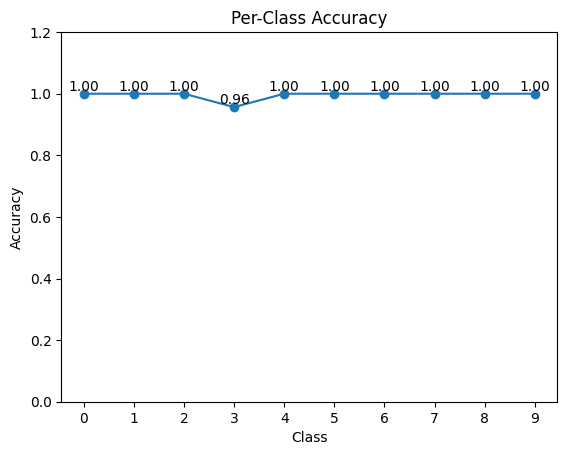

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have mnist_test_28 for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the accuracy for each class using the Accuracy metric from torchmetrics
class_accuracy_metric = torchmetrics.Accuracy(task='multiclass',num_classes=10, average=None)
class_accuracy_metric(predicted_classes, labels)
class_accuracy = class_accuracy_metric.compute()

# Calculate the total accuracy
total_accuracy = (predicted_classes == labels).float().mean().item()

print(f"Total Accuracy: {total_accuracy:.4f}")

# Plotting the per-class accuracy
class_indices = range(10)

plt.plot(class_indices, class_accuracy, marker='o')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_accuracy):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Precision

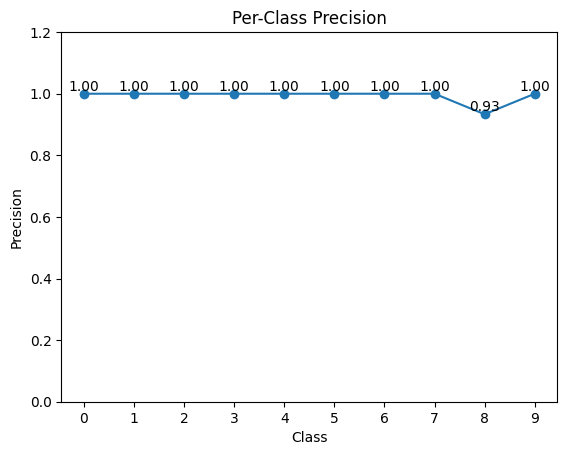

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have test_loader for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the precision for each class using the Precision metric from torchmetrics
class_precision_metric = torchmetrics.Precision(task='multiclass',num_classes=10, average=None)
class_precision_metric(predicted_classes, labels)
class_precision = class_precision_metric.compute()

# Plot the per-class precision
class_indices = range(10)
plt.plot(class_indices, class_precision, marker='o')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Per-Class Precision')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_precision):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Recall

<ipython-input-17-33187ac5e647>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_recall_metric(torch.tensor(predicted_classes), torch.tensor(labels))


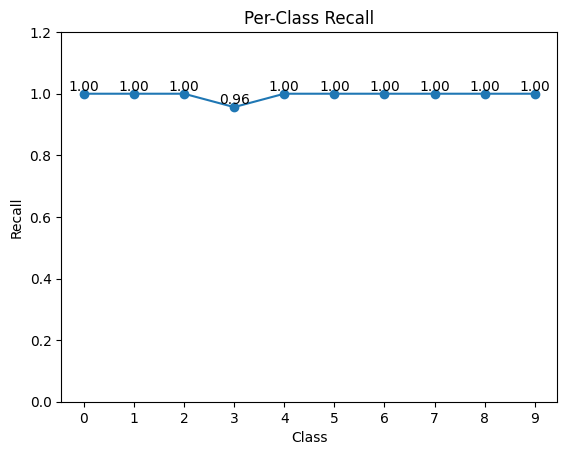

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have test_loader for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the recall for each class using the Recall metric from torchmetrics
class_recall_metric = torchmetrics.Recall(task='multiclass', num_classes=10, average=None)
class_recall_metric(torch.tensor(predicted_classes), torch.tensor(labels))
class_recall = class_recall_metric.compute()

# Plot the per-class recall
class_indices = range(10)
plt.plot(class_indices, class_recall, marker='o')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Per-Class Recall')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_recall):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Another AlexNet with different strides


In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from helper_evaluation import set_all_seeds, set_deterministic, compute_confusion_matrix
from helper_train import train_model
from helper_plotting import plot_training_loss, plot_accuracy, show_examples, plot_confusion_matrix
from helper_dataset import get_dataloaders_mnist, UnNormalize

In [ ]:
RANDOM_SEED = 123
BATCH_SIZE = 256
NUM_EPOCHS = 20
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
set_all_seeds(RANDOM_SEED)
#set_deterministic()

In [ ]:
import torchvision.transforms as transforms

train_transforms = transforms.Compose([
    transforms.Resize((70, 70)),
    transforms.RandomCrop((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Grayscale images have only one channel, so use a single value for mean and std.
])

test_transforms = transforms.Compose([
    transforms.Resize((70, 70)),
    transforms.CenterCrop((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Assuming you have a function named get_dataloaders_mnist that loads the MNIST dataset.
train_loader, valid_loader, test_loader = get_dataloaders_mnist(
    batch_size=BATCH_SIZE,
    validation_fraction=0.1,
    train_transforms=train_transforms,
    test_transforms=test_transforms,
    num_workers=2
)


# Checking the dataset
for images, labels in train_loader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Image batch dimensions: torch.Size([256, 1, 64, 64])
Image label dimensions: torch.Size([256])
Class labels of 10 examples: tensor([4, 5, 8, 9, 9, 4, 9, 9, 3, 9])


Times 2

In [ ]:
import torch

class AlexNet(torch.nn.Module):

    def __init__(self, num_classes):
        super().__init__()
        self.features = torch.nn.Sequential(
            torch.nn.Conv2d(1, 64, kernel_size=11, stride=8, padding=3),  # Adjust padding to maintain spatial size
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(64, 192, kernel_size=5, padding=2),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(192, 384, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 256, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = torch.nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = torch.nn.Sequential(
            torch.nn.Dropout(0.5),
            torch.nn.Linear(256 * 6 * 6, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(4096, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        logits = self.classifier(x)
        return logits


Epoch: 001/020 | Batch 0000/0210 | Loss: 2.3028
Epoch: 001/020 | Batch 0100/0210 | Loss: 2.2985
Epoch: 001/020 | Batch 0200/0210 | Loss: 2.2190
Epoch: 001/020 | Train: 22.52% | Validation: 22.50%
Time elapsed: 1.57 min
Epoch: 002/020 | Batch 0000/0210 | Loss: 2.1174
Epoch: 002/020 | Batch 0100/0210 | Loss: 0.5729
Epoch: 002/020 | Batch 0200/0210 | Loss: 0.2378
Epoch: 002/020 | Train: 92.11% | Validation: 94.97%
Time elapsed: 3.18 min
Epoch: 003/020 | Batch 0000/0210 | Loss: 0.2841
Epoch: 003/020 | Batch 0100/0210 | Loss: 0.1884
Epoch: 003/020 | Batch 0200/0210 | Loss: 0.1841
Epoch: 003/020 | Train: 96.03% | Validation: 97.13%
Time elapsed: 4.77 min
Epoch: 004/020 | Batch 0000/0210 | Loss: 0.1259
Epoch: 004/020 | Batch 0100/0210 | Loss: 0.1486
Epoch: 004/020 | Batch 0200/0210 | Loss: 0.0955
Epoch: 004/020 | Train: 96.44% | Validation: 97.82%
Time elapsed: 6.39 min
Epoch: 005/020 | Batch 0000/0210 | Loss: 0.1343
Epoch: 005/020 | Batch 0100/0210 | Loss: 0.1348
Epoch: 005/020 | Batch 0200/

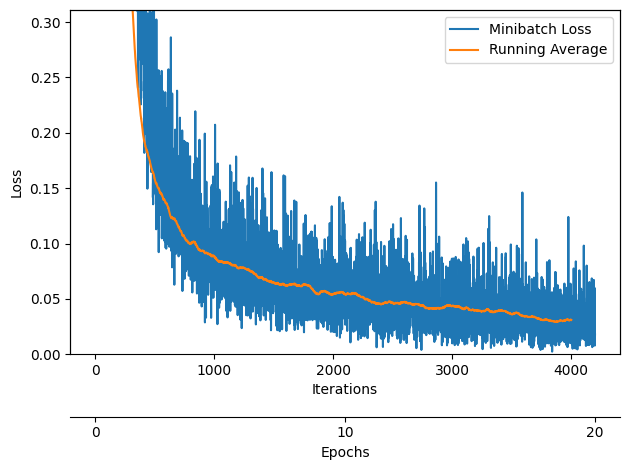

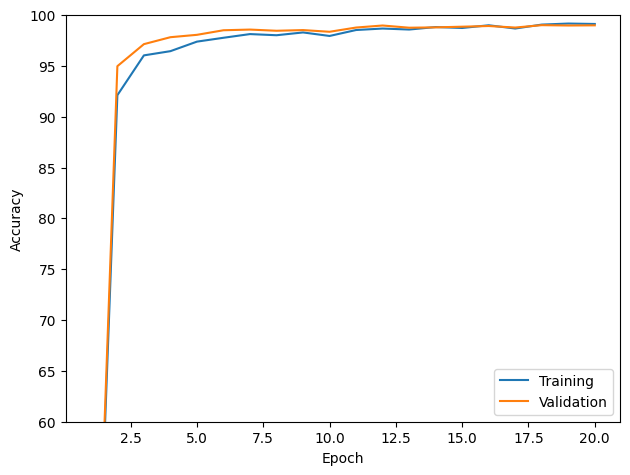

In [ ]:
model = AlexNet(num_classes=10)

model = model.to(DEVICE)


optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    scheduler_on='valid_acc',
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

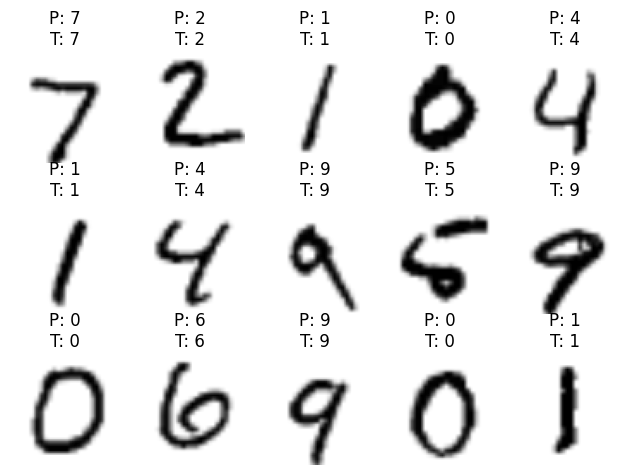

In [ ]:
model.cpu()
unnormalizer = UnNormalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
class_dict = {0: '0',
              1: '1',
              2: '2',
              3: '3',
              4: '4',
              5: '5',
              6: '6',
              7: '7',
              8: '8',
              9: '9'}

show_examples(model=model, data_loader=test_loader, unnormalizer=unnormalizer, class_dict=class_dict)

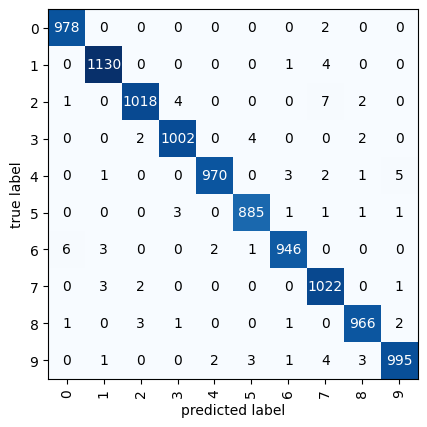

In [ ]:

mat = compute_confusion_matrix(model=model, data_loader=test_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=class_dict.values())
plt.show()



In [ ]:
imgs, labels = next(iter(test_loader))


# Set the model to evaluation mode and move it to the same device as the input tensor

model.to(DEVICE)

# Move the input tensor to the same device as the model
imgs = imgs.to(DEVICE)

# Calculate the predictions using the model on the test data
predictions = model(imgs)

# For each row determine the columns with the highest score, the prediction
predicted_classes = torch.argmax(predictions, dim=1)

# Convert the lists to tensors and move them to the CPU for calculation
predicted_classes = predicted_classes.cpu()
labels = labels.cpu()



Accuracy

Total Accuracy: 1.0000


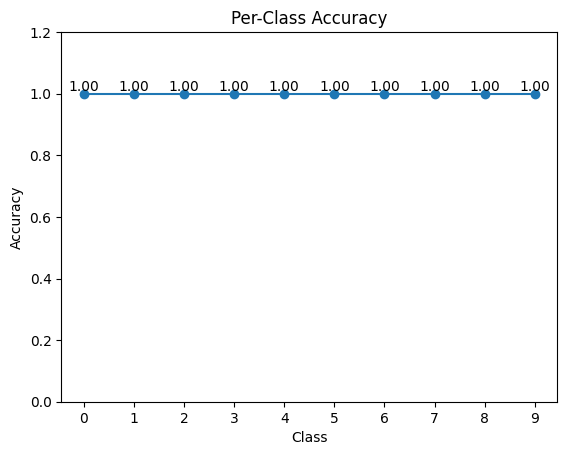

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have mnist_test_28 for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the accuracy for each class using the Accuracy metric from torchmetrics
class_accuracy_metric = torchmetrics.Accuracy(task='multiclass',num_classes=10, average=None)
class_accuracy_metric(predicted_classes, labels)
class_accuracy = class_accuracy_metric.compute()

# Calculate the total accuracy
total_accuracy = (predicted_classes == labels).float().mean().item()

print(f"Total Accuracy: {total_accuracy:.4f}")

# Plotting the per-class accuracy
class_indices = range(10)

plt.plot(class_indices, class_accuracy, marker='o')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_accuracy):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Precision

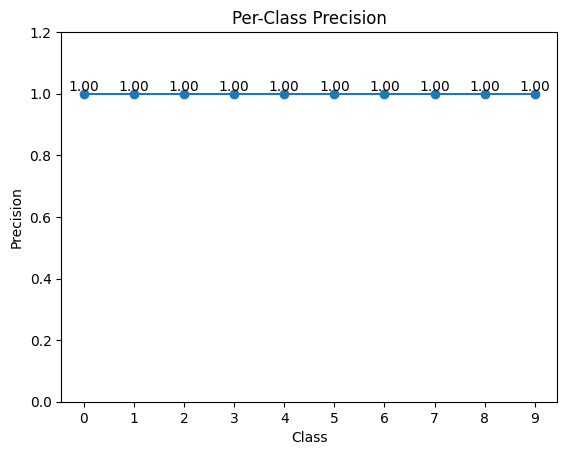

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have test_loader for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the precision for each class using the Precision metric from torchmetrics
class_precision_metric = torchmetrics.Precision(task='multiclass',num_classes=10, average=None)
class_precision_metric(predicted_classes, labels)
class_precision = class_precision_metric.compute()

# Plot the per-class precision
class_indices = range(10)
plt.plot(class_indices, class_precision, marker='o')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Per-Class Precision')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_precision):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Recall

<ipython-input-29-33187ac5e647>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_recall_metric(torch.tensor(predicted_classes), torch.tensor(labels))


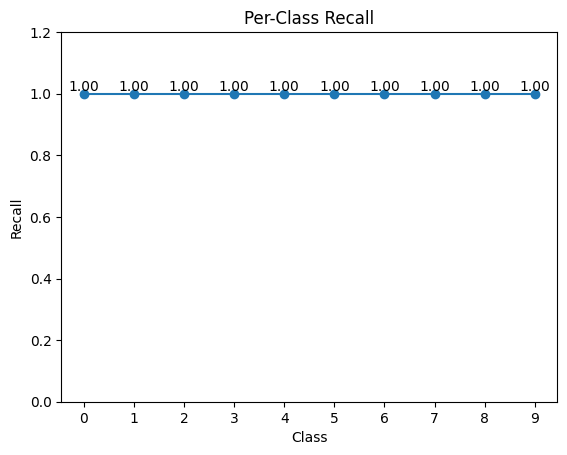

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have test_loader for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the recall for each class using the Recall metric from torchmetrics
class_recall_metric = torchmetrics.Recall(task='multiclass', num_classes=10, average=None)
class_recall_metric(torch.tensor(predicted_classes), torch.tensor(labels))
class_recall = class_recall_metric.compute()

# Plot the per-class recall
class_indices = range(10)
plt.plot(class_indices, class_recall, marker='o')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Per-Class Recall')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_recall):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Times 4

In [ ]:

class AlexNet(torch.nn.Module):

    def __init__(self, num_classes):
        super().__init__()
        self.features = torch.nn.Sequential(
            torch.nn.Conv2d(1, 64, kernel_size=11, stride=16, padding=22),  # Adjust padding to maintain spatial size
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(64, 192, kernel_size=5, padding=2),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(192, 384, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 256, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = torch.nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = torch.nn.Sequential(
            torch.nn.Dropout(0.5),
            torch.nn.Linear(256 * 6 * 6, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(4096, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        logits = self.classifier(x)
        return logits

Epoch: 001/020 | Batch 0000/0210 | Loss: 2.3034
Epoch: 001/020 | Batch 0100/0210 | Loss: 2.2998
Epoch: 001/020 | Batch 0200/0210 | Loss: 2.2775
Epoch: 001/020 | Train: 18.99% | Validation: 18.78%
Time elapsed: 1.62 min
Epoch: 002/020 | Batch 0000/0210 | Loss: 2.2707
Epoch: 002/020 | Batch 0100/0210 | Loss: 1.9367
Epoch: 002/020 | Batch 0200/0210 | Loss: 1.4063
Epoch: 002/020 | Train: 51.33% | Validation: 55.83%
Time elapsed: 3.23 min
Epoch: 003/020 | Batch 0000/0210 | Loss: 1.2907
Epoch: 003/020 | Batch 0100/0210 | Loss: 0.7253
Epoch: 003/020 | Batch 0200/0210 | Loss: 0.3519
Epoch: 003/020 | Train: 85.21% | Validation: 89.27%
Time elapsed: 4.85 min
Epoch: 004/020 | Batch 0000/0210 | Loss: 0.3718
Epoch: 004/020 | Batch 0100/0210 | Loss: 0.4096
Epoch: 004/020 | Batch 0200/0210 | Loss: 0.2351
Epoch: 004/020 | Train: 91.78% | Validation: 94.92%
Time elapsed: 6.48 min
Epoch: 005/020 | Batch 0000/0210 | Loss: 0.3228
Epoch: 005/020 | Batch 0100/0210 | Loss: 0.3303
Epoch: 005/020 | Batch 0200/

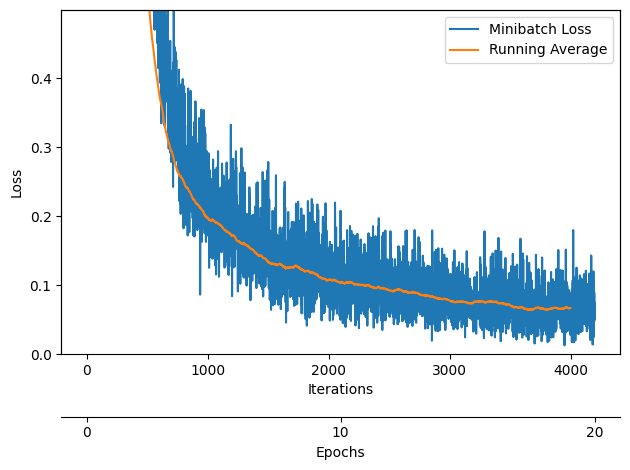

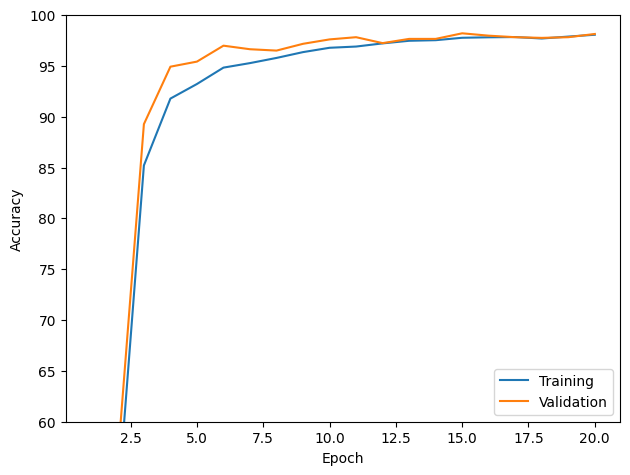

In [ ]:
model = AlexNet(num_classes=10)

model = model.to(DEVICE)


optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    scheduler_on='valid_acc',
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

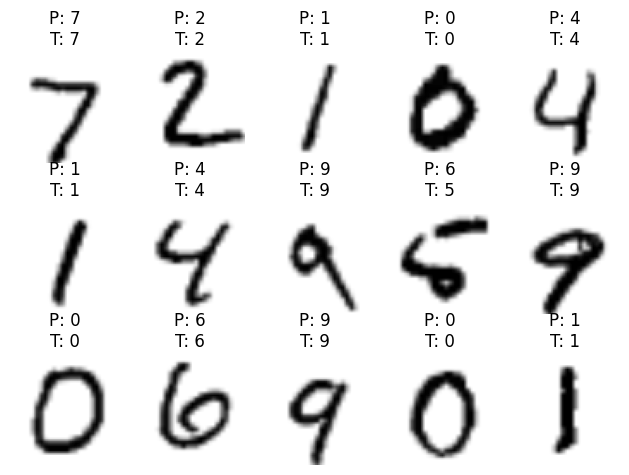

In [ ]:
model.cpu()
unnormalizer = UnNormalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
class_dict = {0: '0',
              1: '1',
              2: '2',
              3: '3',
              4: '4',
              5: '5',
              6: '6',
              7: '7',
              8: '8',
              9: '9'}

show_examples(model=model, data_loader=test_loader, unnormalizer=unnormalizer, class_dict=class_dict)

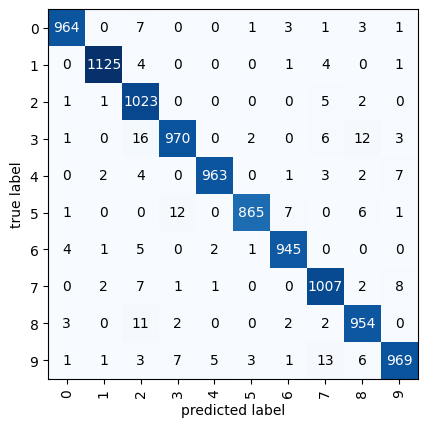

In [ ]:

mat = compute_confusion_matrix(model=model, data_loader=test_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=class_dict.values())
plt.show()



In [ ]:
imgs, labels = next(iter(test_loader))


# Set the model to evaluation mode and move it to the same device as the input tensor

model.to(DEVICE)

# Move the input tensor to the same device as the model
imgs = imgs.to(DEVICE)

# Calculate the predictions using the model on the test data
predictions = model(imgs)

# For each row determine the columns with the highest score, the prediction
predicted_classes = torch.argmax(predictions, dim=1)

# Convert the lists to tensors and move them to the CPU for calculation
predicted_classes = predicted_classes.cpu()
labels = labels.cpu()



Accuracy

Total Accuracy: 0.9727


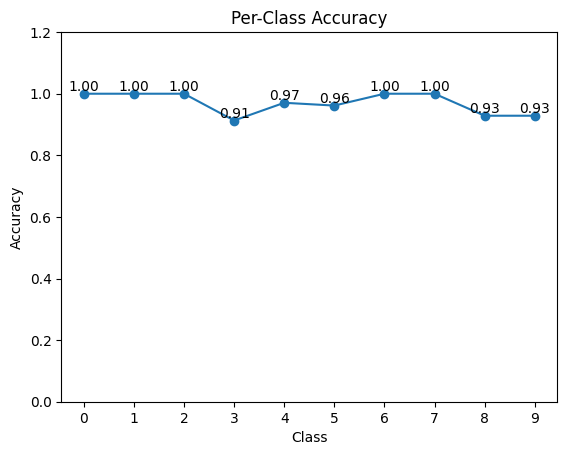

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have mnist_test_28 for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the accuracy for each class using the Accuracy metric from torchmetrics
class_accuracy_metric = torchmetrics.Accuracy(task='multiclass',num_classes=10, average=None)
class_accuracy_metric(predicted_classes, labels)
class_accuracy = class_accuracy_metric.compute()

# Calculate the total accuracy
total_accuracy = (predicted_classes == labels).float().mean().item()

print(f"Total Accuracy: {total_accuracy:.4f}")

# Plotting the per-class accuracy
class_indices = range(10)

plt.plot(class_indices, class_accuracy, marker='o')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_accuracy):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Precision

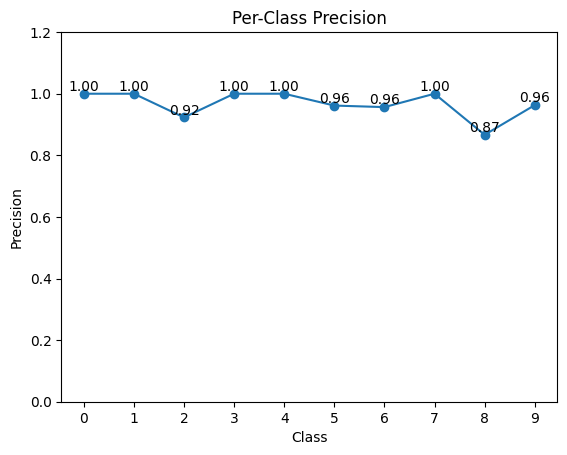

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have test_loader for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the precision for each class using the Precision metric from torchmetrics
class_precision_metric = torchmetrics.Precision(task='multiclass',num_classes=10, average=None)
class_precision_metric(predicted_classes, labels)
class_precision = class_precision_metric.compute()

# Plot the per-class precision
class_indices = range(10)
plt.plot(class_indices, class_precision, marker='o')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Per-Class Precision')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_precision):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Recall

<ipython-input-37-33187ac5e647>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_recall_metric(torch.tensor(predicted_classes), torch.tensor(labels))


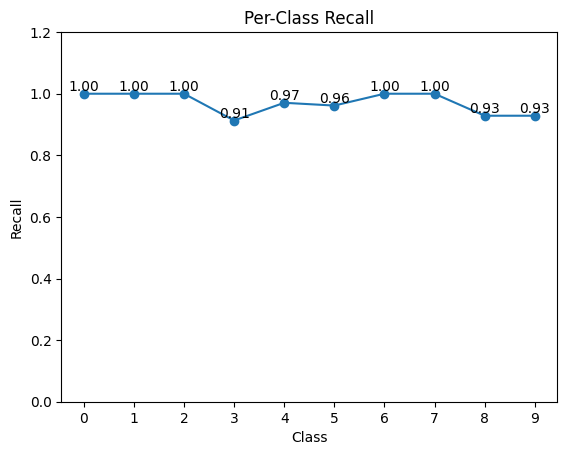

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have test_loader for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the recall for each class using the Recall metric from torchmetrics
class_recall_metric = torchmetrics.Recall(task='multiclass', num_classes=10, average=None)
class_recall_metric(torch.tensor(predicted_classes), torch.tensor(labels))
class_recall = class_recall_metric.compute()

# Plot the per-class recall
class_indices = range(10)
plt.plot(class_indices, class_recall, marker='o')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Per-Class Recall')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_recall):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Other AlexNet with more hidden layers

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [ ]:


from helper_evaluation import set_all_seeds, set_deterministic, compute_confusion_matrix
from helper_train import train_model
from helper_plotting import plot_training_loss, plot_accuracy, show_examples, plot_confusion_matrix
from helper_dataset import get_dataloaders_mnist, UnNormalize



In [ ]:


RANDOM_SEED = 123
BATCH_SIZE = 256
NUM_EPOCHS = 20
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
set_all_seeds(RANDOM_SEED)
#set_deterministic()



In [ ]:
import torchvision.transforms as transforms

train_transforms = transforms.Compose([
    transforms.Resize((70, 70)),
    transforms.RandomCrop((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Grayscale images have only one channel, so use a single value for mean and std.
])

test_transforms = transforms.Compose([
    transforms.Resize((70, 70)),
    transforms.CenterCrop((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Assuming you have a function named get_dataloaders_mnist that loads the MNIST dataset.
train_loader, valid_loader, test_loader = get_dataloaders_mnist(
    batch_size=BATCH_SIZE,
    validation_fraction=0.1,
    train_transforms=train_transforms,
    test_transforms=test_transforms,
    num_workers=2
)


# Checking the dataset
for images, labels in train_loader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Image batch dimensions: torch.Size([256, 1, 64, 64])
Image label dimensions: torch.Size([256])
Class labels of 10 examples: tensor([4, 5, 8, 9, 9, 4, 9, 9, 3, 9])


Other AlexNet plus more 2 hidden layers

In [ ]:
class AlexNet(torch.nn.Module):

    def __init__(self, num_classes):
        super().__init__()
        self.features = torch.nn.Sequential(
            torch.nn.Conv2d(1, 64, kernel_size=11, stride=4, padding=2),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(64, 192, kernel_size=5, padding=2),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(192, 384, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 384, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 384, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 256, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(256, 256, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = torch.nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = torch.nn.Sequential(
            torch.nn.Dropout(0.5),
            torch.nn.Linear(256 * 6 * 6, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(4096, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        logits = self.classifier(x)
        return logits

Epoch: 001/020 | Batch 0000/0210 | Loss: 2.3021
Epoch: 001/020 | Batch 0100/0210 | Loss: 2.2988
Epoch: 001/020 | Batch 0200/0210 | Loss: 2.2976
Epoch: 001/020 | Train: 11.32% | Validation: 10.50%
Time elapsed: 1.60 min
Epoch: 002/020 | Batch 0000/0210 | Loss: 2.3024
Epoch: 002/020 | Batch 0100/0210 | Loss: 2.3056
Epoch: 002/020 | Batch 0200/0210 | Loss: 2.2960
Epoch: 002/020 | Train: 11.33% | Validation: 10.50%
Time elapsed: 3.23 min
Epoch: 003/020 | Batch 0000/0210 | Loss: 2.3061
Epoch: 003/020 | Batch 0100/0210 | Loss: 2.2955
Epoch: 003/020 | Batch 0200/0210 | Loss: 2.3007
Epoch: 003/020 | Train: 11.32% | Validation: 10.50%
Time elapsed: 4.83 min
Epoch: 004/020 | Batch 0000/0210 | Loss: 2.3026
Epoch: 004/020 | Batch 0100/0210 | Loss: 2.2998
Epoch: 004/020 | Batch 0200/0210 | Loss: 2.3007
Epoch: 004/020 | Train: 11.31% | Validation: 10.50%
Time elapsed: 6.44 min
Epoch: 005/020 | Batch 0000/0210 | Loss: 2.2952
Epoch: 005/020 | Batch 0100/0210 | Loss: 2.3052
Epoch: 005/020 | Batch 0200/

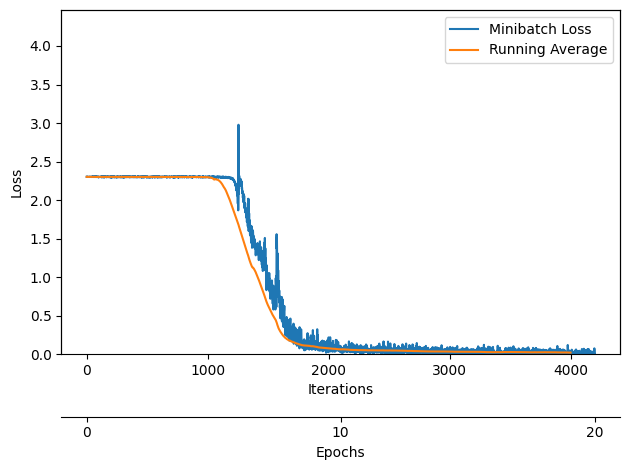

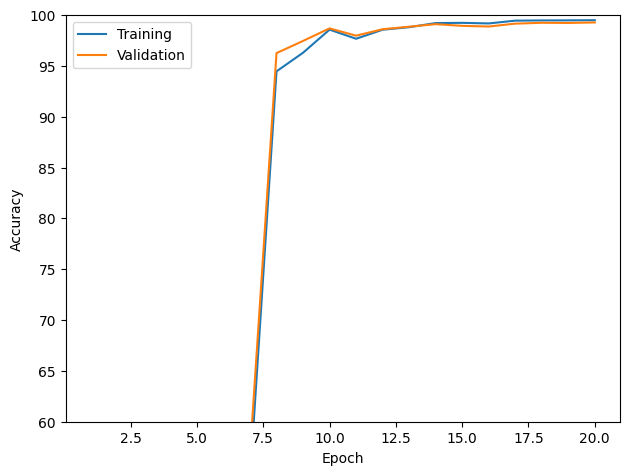

In [ ]:
model = AlexNet(num_classes=10)

model = model.to(DEVICE)


optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    scheduler_on='valid_acc',
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

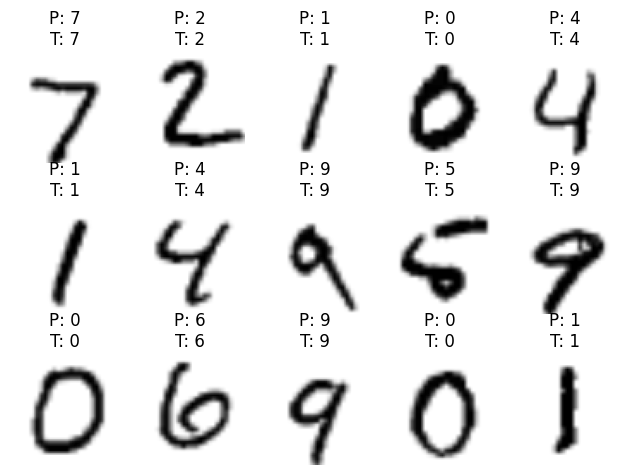

In [ ]:
model.cpu()
unnormalizer = UnNormalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
class_dict = {0: '0',
              1: '1',
              2: '2',
              3: '3',
              4: '4',
              5: '5',
              6: '6',
              7: '7',
              8: '8',
              9: '9'}

show_examples(model=model, data_loader=test_loader, unnormalizer=unnormalizer, class_dict=class_dict)

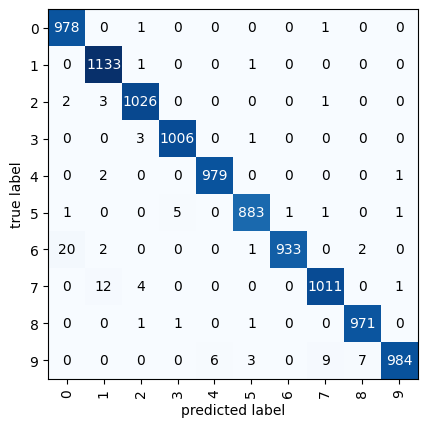

In [ ]:

mat = compute_confusion_matrix(model=model, data_loader=test_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=class_dict.values())
plt.show()


In [ ]:
imgs, labels = next(iter(test_loader))


# Set the model to evaluation mode and move it to the same device as the input tensor

model.to(DEVICE)

# Move the input tensor to the same device as the model
imgs = imgs.to(DEVICE)

# Calculate the predictions using the model on the test data
predictions = model(imgs)

# For each row determine the columns with the highest score, the prediction
predicted_classes = torch.argmax(predictions, dim=1)

# Convert the lists to tensors and move them to the CPU for calculation
predicted_classes = predicted_classes.cpu()
labels = labels.cpu()



Accuracy

Total Accuracy: 1.0000


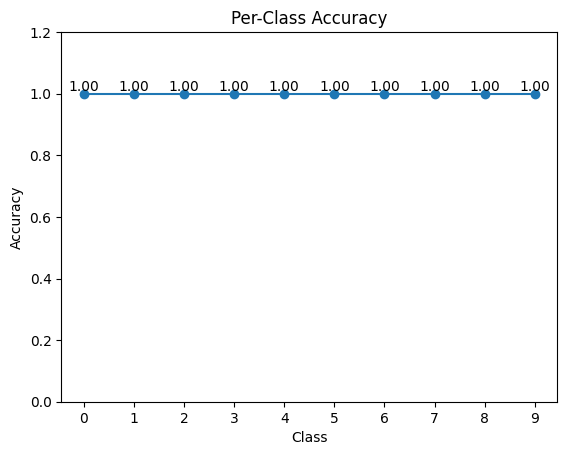

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have mnist_test_28 for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the accuracy for each class using the Accuracy metric from torchmetrics
class_accuracy_metric = torchmetrics.Accuracy(task='multiclass',num_classes=10, average=None)
class_accuracy_metric(predicted_classes, labels)
class_accuracy = class_accuracy_metric.compute()

# Calculate the total accuracy
total_accuracy = (predicted_classes == labels).float().mean().item()

print(f"Total Accuracy: {total_accuracy:.4f}")

# Plotting the per-class accuracy
class_indices = range(10)

plt.plot(class_indices, class_accuracy, marker='o')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_accuracy):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Precision

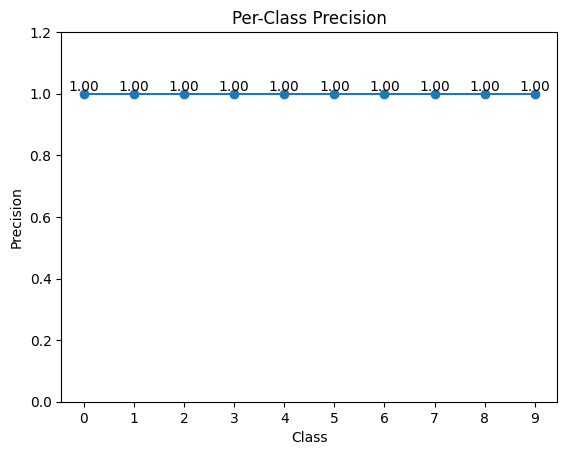

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have test_loader for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the precision for each class using the Precision metric from torchmetrics
class_precision_metric = torchmetrics.Precision(task='multiclass',num_classes=10, average=None)
class_precision_metric(predicted_classes, labels)
class_precision = class_precision_metric.compute()

# Plot the per-class precision
class_indices = range(10)
plt.plot(class_indices, class_precision, marker='o')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Per-Class Precision')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_precision):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Recall

<ipython-input-49-33187ac5e647>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_recall_metric(torch.tensor(predicted_classes), torch.tensor(labels))


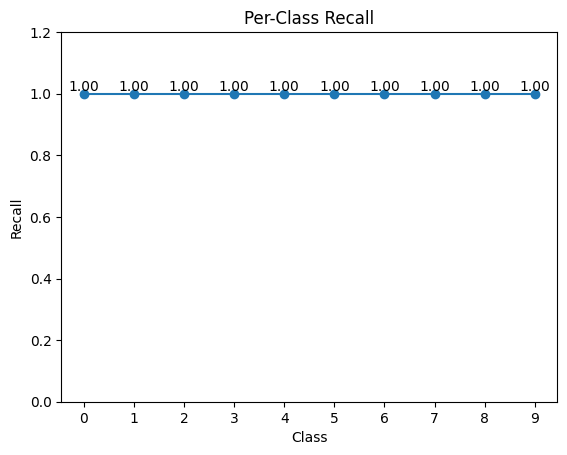

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have test_loader for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the recall for each class using the Recall metric from torchmetrics
class_recall_metric = torchmetrics.Recall(task='multiclass', num_classes=10, average=None)
class_recall_metric(torch.tensor(predicted_classes), torch.tensor(labels))
class_recall = class_recall_metric.compute()

# Plot the per-class recall
class_indices = range(10)
plt.plot(class_indices, class_recall, marker='o')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Per-Class Recall')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_recall):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Other AlexNet plus more 4 hidden layers

In [ ]:
class AlexNet(torch.nn.Module):

    def __init__(self, num_classes):
        super().__init__()
        self.features = torch.nn.Sequential(
            torch.nn.Conv2d(1, 64, kernel_size=11, stride=4, padding=2),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(64, 192, kernel_size=5, padding=2),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(192, 384, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 384, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 384, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 384, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 384, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 256, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(256, 256, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = torch.nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = torch.nn.Sequential(
            torch.nn.Dropout(0.5),
            torch.nn.Linear(256 * 6 * 6, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(4096, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        logits = self.classifier(x)
        return logits

Epoch: 001/020 | Batch 0000/0210 | Loss: 2.3034
Epoch: 001/020 | Batch 0100/0210 | Loss: 2.3001
Epoch: 001/020 | Batch 0200/0210 | Loss: 2.3033
Epoch: 001/020 | Train: 11.32% | Validation: 10.50%
Time elapsed: 1.71 min
Epoch: 002/020 | Batch 0000/0210 | Loss: 2.3027
Epoch: 002/020 | Batch 0100/0210 | Loss: 2.2963
Epoch: 002/020 | Batch 0200/0210 | Loss: 2.2974
Epoch: 002/020 | Train: 11.32% | Validation: 10.50%
Time elapsed: 3.33 min
Epoch: 003/020 | Batch 0000/0210 | Loss: 2.3018
Epoch: 003/020 | Batch 0100/0210 | Loss: 2.2973
Epoch: 003/020 | Batch 0200/0210 | Loss: 2.2971
Epoch: 003/020 | Train: 11.32% | Validation: 10.50%
Time elapsed: 5.09 min
Epoch: 004/020 | Batch 0000/0210 | Loss: 2.3039
Epoch: 004/020 | Batch 0100/0210 | Loss: 2.3088
Epoch: 004/020 | Batch 0200/0210 | Loss: 2.3026
Epoch: 004/020 | Train: 11.32% | Validation: 10.50%
Time elapsed: 6.76 min
Epoch: 005/020 | Batch 0000/0210 | Loss: 2.3024
Epoch: 005/020 | Batch 0100/0210 | Loss: 2.3023
Epoch: 005/020 | Batch 0200/

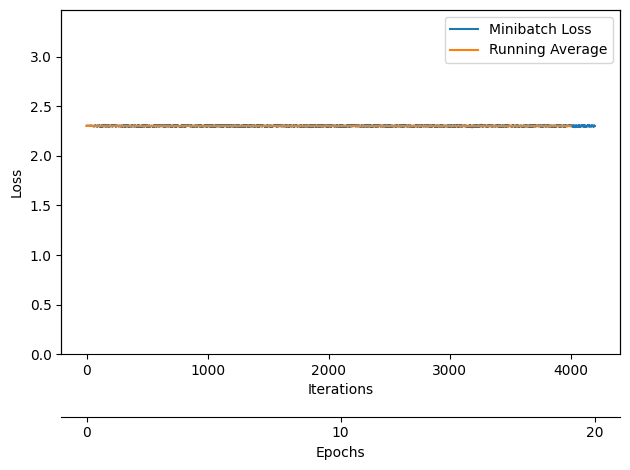

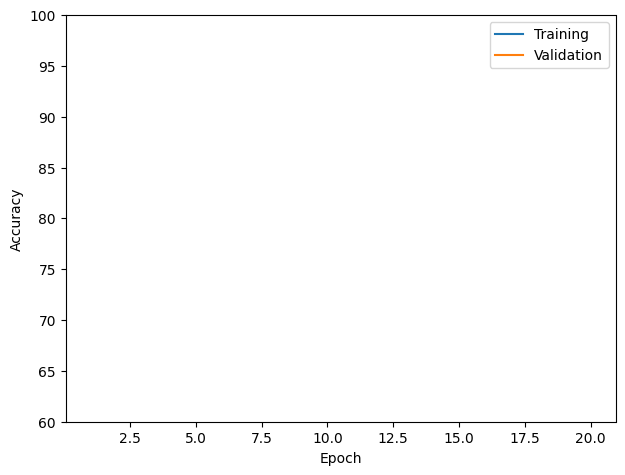

In [ ]:
model = AlexNet(num_classes=10)

model = model.to(DEVICE)


optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    scheduler_on='valid_acc',
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

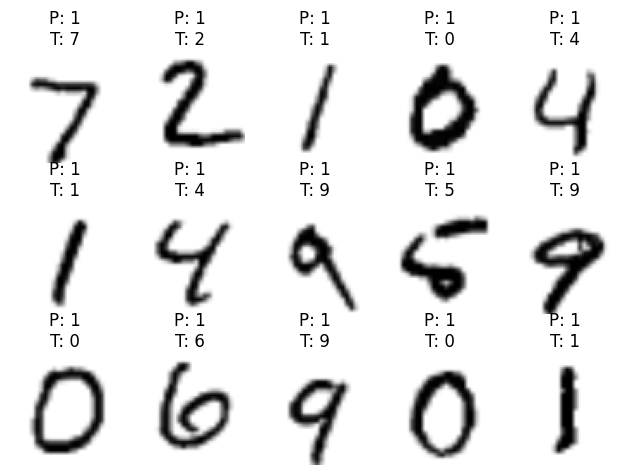

In [ ]:
model.cpu()
unnormalizer = UnNormalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
class_dict = {0: '0',
              1: '1',
              2: '2',
              3: '3',
              4: '4',
              5: '5',
              6: '6',
              7: '7',
              8: '8',
              9: '9'}

show_examples(model=model, data_loader=test_loader, unnormalizer=unnormalizer, class_dict=class_dict)

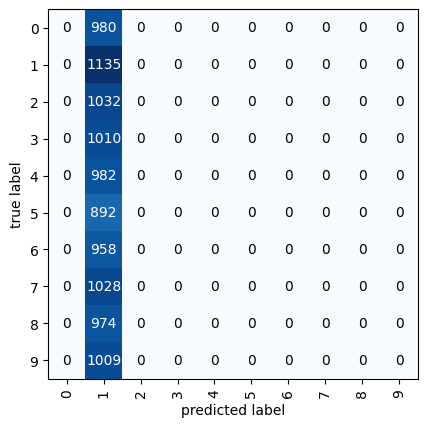

In [ ]:

mat = compute_confusion_matrix(model=model, data_loader=test_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=class_dict.values())
plt.show()

In [ ]:
imgs, labels = next(iter(test_loader))


# Set the model to evaluation mode and move it to the same device as the input tensor

model.to(DEVICE)

# Move the input tensor to the same device as the model
imgs = imgs.to(DEVICE)

# Calculate the predictions using the model on the test data
predictions = model(imgs)

# For each row determine the columns with the highest score, the prediction
predicted_classes = torch.argmax(predictions, dim=1)

# Convert the lists to tensors and move them to the CPU for calculation
predicted_classes = predicted_classes.cpu()
labels = labels.cpu()



Accuracy

Total Accuracy: 0.1367


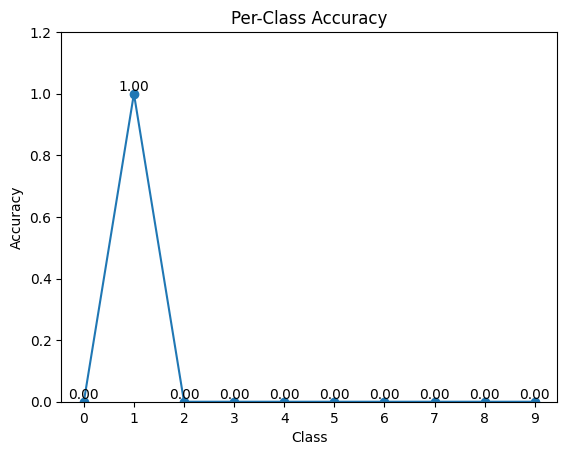

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have mnist_test_28 for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the accuracy for each class using the Accuracy metric from torchmetrics
class_accuracy_metric = torchmetrics.Accuracy(task='multiclass',num_classes=10, average=None)
class_accuracy_metric(predicted_classes, labels)
class_accuracy = class_accuracy_metric.compute()

# Calculate the total accuracy
total_accuracy = (predicted_classes == labels).float().mean().item()

print(f"Total Accuracy: {total_accuracy:.4f}")

# Plotting the per-class accuracy
class_indices = range(10)

plt.plot(class_indices, class_accuracy, marker='o')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_accuracy):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Precision

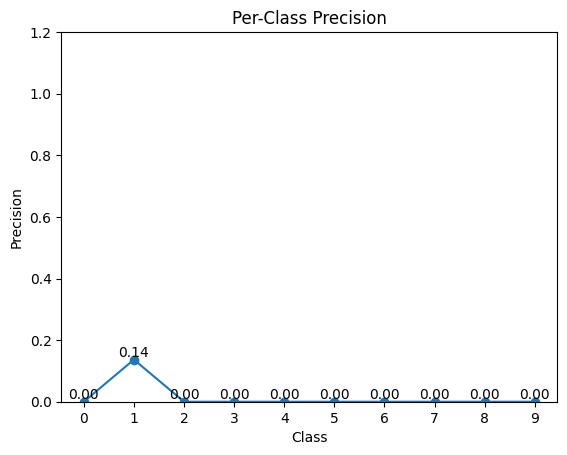

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have test_loader for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the precision for each class using the Precision metric from torchmetrics
class_precision_metric = torchmetrics.Precision(task='multiclass',num_classes=10, average=None)
class_precision_metric(predicted_classes, labels)
class_precision = class_precision_metric.compute()

# Plot the per-class precision
class_indices = range(10)
plt.plot(class_indices, class_precision, marker='o')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Per-Class Precision')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_precision):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Recall

<ipython-input-21-33187ac5e647>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_recall_metric(torch.tensor(predicted_classes), torch.tensor(labels))


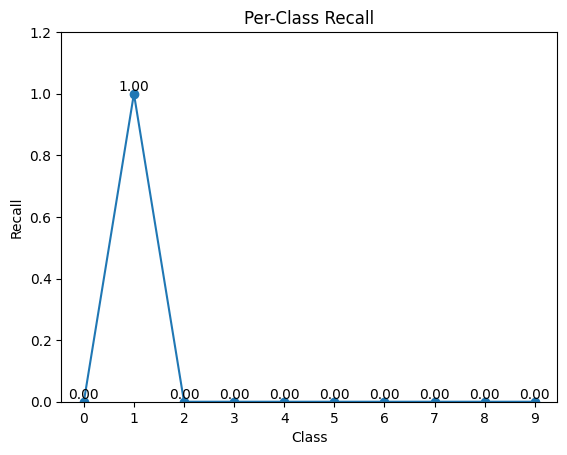

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have test_loader for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the recall for each class using the Recall metric from torchmetrics
class_recall_metric = torchmetrics.Recall(task='multiclass', num_classes=10, average=None)
class_recall_metric(torch.tensor(predicted_classes), torch.tensor(labels))
class_recall = class_recall_metric.compute()

# Plot the per-class recall
class_indices = range(10)
plt.plot(class_indices, class_recall, marker='o')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Per-Class Recall')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_recall):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Other AlexNet plus more 8 hidden layers

In [ ]:
class AlexNet(torch.nn.Module):

    def __init__(self, num_classes):
        super().__init__()
        self.features = torch.nn.Sequential(
            torch.nn.Conv2d(1, 64, kernel_size=11, stride=4, padding=2),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(64, 192, kernel_size=5, padding=2),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(192, 384, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 384, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 384, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 384, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 384, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 384, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 384, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 384, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 384, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 256, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(256, 256, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = torch.nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = torch.nn.Sequential(
            torch.nn.Dropout(0.5),
            torch.nn.Linear(256 * 6 * 6, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(4096, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        logits = self.classifier(x)
        return logits

Epoch: 001/020 | Batch 0000/0210 | Loss: 2.3030
Epoch: 001/020 | Batch 0100/0210 | Loss: 2.3022
Epoch: 001/020 | Batch 0200/0210 | Loss: 2.3025
Epoch: 001/020 | Train: 11.33% | Validation: 10.50%
Time elapsed: 1.66 min
Epoch: 002/020 | Batch 0000/0210 | Loss: 2.3001
Epoch: 002/020 | Batch 0100/0210 | Loss: 2.3023
Epoch: 002/020 | Batch 0200/0210 | Loss: 2.2988
Epoch: 002/020 | Train: 11.32% | Validation: 10.50%
Time elapsed: 3.32 min
Epoch: 003/020 | Batch 0000/0210 | Loss: 2.3024
Epoch: 003/020 | Batch 0100/0210 | Loss: 2.2984
Epoch: 003/020 | Batch 0200/0210 | Loss: 2.2993
Epoch: 003/020 | Train: 11.31% | Validation: 10.50%
Time elapsed: 4.99 min
Epoch: 004/020 | Batch 0000/0210 | Loss: 2.2990
Epoch: 004/020 | Batch 0100/0210 | Loss: 2.3034
Epoch: 004/020 | Batch 0200/0210 | Loss: 2.3039
Epoch: 004/020 | Train: 11.30% | Validation: 10.50%
Time elapsed: 6.66 min
Epoch: 005/020 | Batch 0000/0210 | Loss: 2.3000
Epoch: 005/020 | Batch 0100/0210 | Loss: 2.3055
Epoch: 005/020 | Batch 0200/

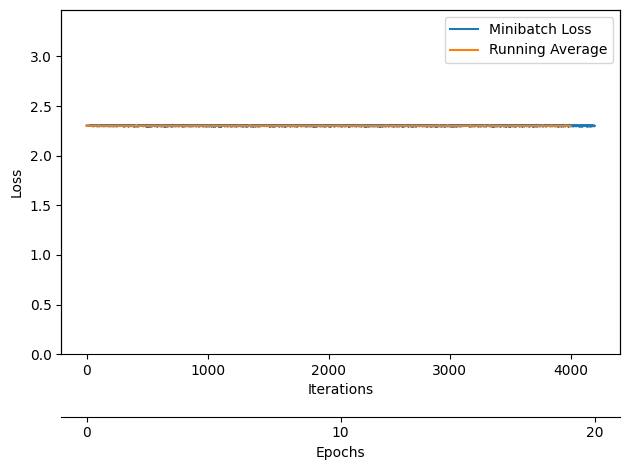

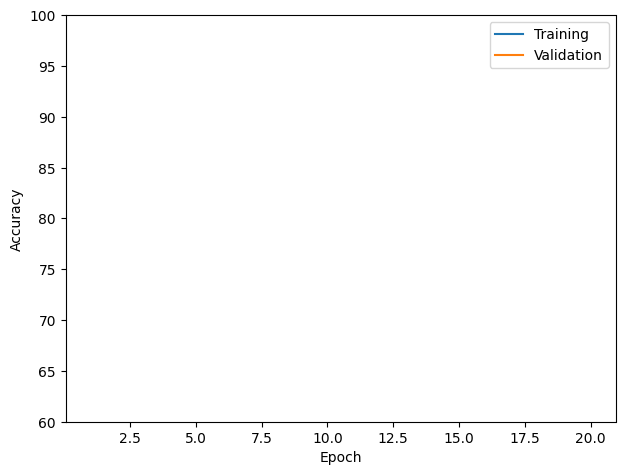

In [ ]:
model = AlexNet(num_classes=10)

model = model.to(DEVICE)


optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    scheduler_on='valid_acc',
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

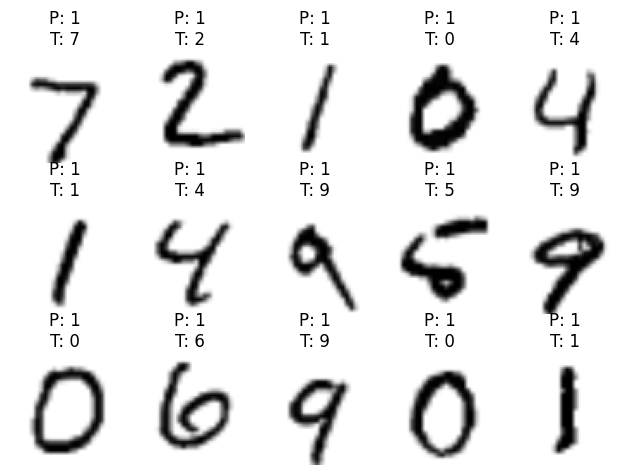

In [ ]:
model.cpu()
unnormalizer = UnNormalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
class_dict = {0: '0',
              1: '1',
              2: '2',
              3: '3',
              4: '4',
              5: '5',
              6: '6',
              7: '7',
              8: '8',
              9: '9'}

show_examples(model=model, data_loader=test_loader, unnormalizer=unnormalizer, class_dict=class_dict)

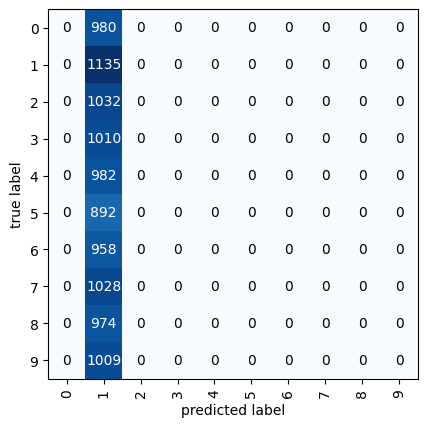

In [ ]:

mat = compute_confusion_matrix(model=model, data_loader=test_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=class_dict.values())
plt.show()



In [ ]:
imgs, labels = next(iter(test_loader))


# Set the model to evaluation mode and move it to the same device as the input tensor

model.to(DEVICE)

# Move the input tensor to the same device as the model
imgs = imgs.to(DEVICE)

# Calculate the predictions using the model on the test data
predictions = model(imgs)

# For each row determine the columns with the highest score, the prediction
predicted_classes = torch.argmax(predictions, dim=1)

# Convert the lists to tensors and move them to the CPU for calculation
predicted_classes = predicted_classes.cpu()
labels = labels.cpu()



Accuracy

Total Accuracy: 0.1367


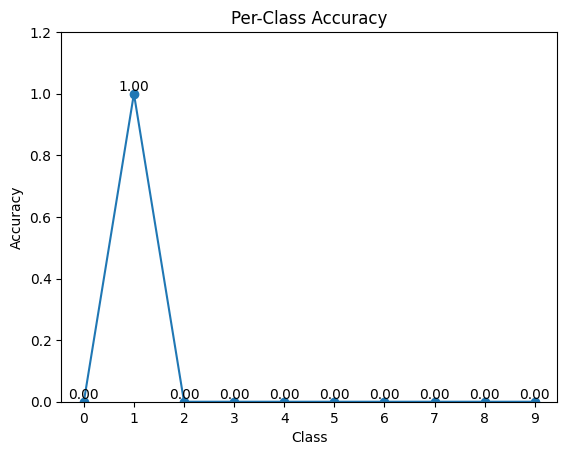

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have mnist_test_28 for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the accuracy for each class using the Accuracy metric from torchmetrics
class_accuracy_metric = torchmetrics.Accuracy(task='multiclass',num_classes=10, average=None)
class_accuracy_metric(predicted_classes, labels)
class_accuracy = class_accuracy_metric.compute()

# Calculate the total accuracy
total_accuracy = (predicted_classes == labels).float().mean().item()

print(f"Total Accuracy: {total_accuracy:.4f}")

# Plotting the per-class accuracy
class_indices = range(10)

plt.plot(class_indices, class_accuracy, marker='o')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_accuracy):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Precision

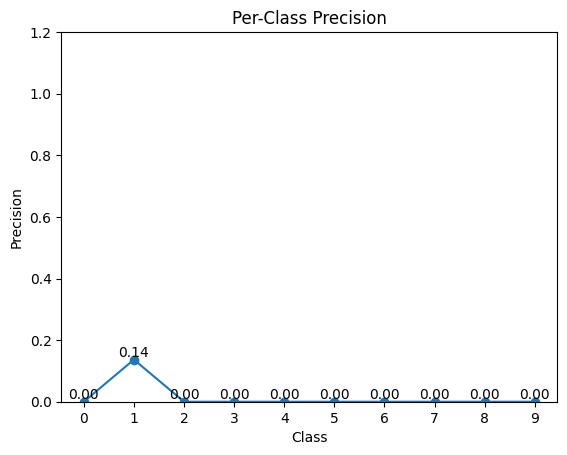

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have test_loader for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the precision for each class using the Precision metric from torchmetrics
class_precision_metric = torchmetrics.Precision(task='multiclass',num_classes=10, average=None)
class_precision_metric(predicted_classes, labels)
class_precision = class_precision_metric.compute()

# Plot the per-class precision
class_indices = range(10)
plt.plot(class_indices, class_precision, marker='o')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Per-Class Precision')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_precision):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Recall

<ipython-input-29-33187ac5e647>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_recall_metric(torch.tensor(predicted_classes), torch.tensor(labels))


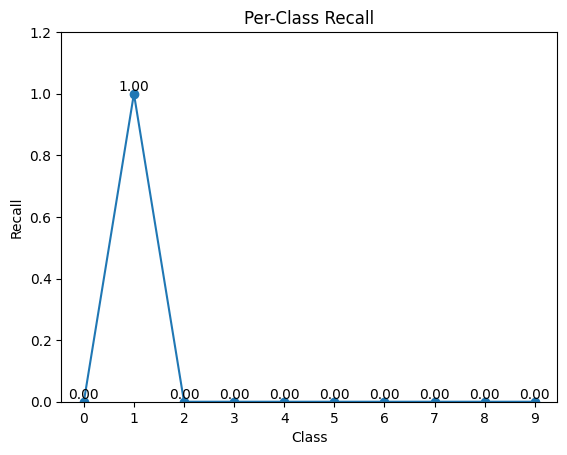

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have test_loader for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the recall for each class using the Recall metric from torchmetrics
class_recall_metric = torchmetrics.Recall(task='multiclass', num_classes=10, average=None)
class_recall_metric(torch.tensor(predicted_classes), torch.tensor(labels))
class_recall = class_recall_metric.compute()

# Plot the per-class recall
class_indices = range(10)
plt.plot(class_indices, class_recall, marker='o')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Per-Class Recall')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_recall):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Dropout

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from helper_evaluation import set_all_seeds, set_deterministic, compute_confusion_matrix
from helper_train import train_model
from helper_plotting import plot_training_loss, plot_accuracy, show_examples, plot_confusion_matrix
from helper_dataset import get_dataloaders_mnist, UnNormalize


In [ ]:
RANDOM_SEED = 123
BATCH_SIZE = 256
NUM_EPOCHS = 20
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
set_all_seeds(RANDOM_SEED)
#set_deterministic()

In [ ]:
import torchvision.transforms as transforms

train_transforms = transforms.Compose([
    transforms.Resize((70, 70)),
    transforms.RandomCrop((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Grayscale images have only one channel, so use a single value for mean and std.
])

test_transforms = transforms.Compose([
    transforms.Resize((70, 70)),
    transforms.CenterCrop((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Assuming you have a function named get_dataloaders_mnist that loads the MNIST dataset.
train_loader, valid_loader, test_loader = get_dataloaders_mnist(
    batch_size=BATCH_SIZE,
    validation_fraction=0.1,
    train_transforms=train_transforms,
    test_transforms=test_transforms,
    num_workers=2
)


# Checking the dataset
for images, labels in train_loader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

100%|██████████| 9912422/9912422 [00:00<00:00, 316417757.48it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 43985364.50it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 205365583.70it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21796943.67it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 244, in _feed
    obj = _ForkingPickler.dumps(obj)
  File "/usr/lib/python3.10/multiprocessing/reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
  File "/usr/local/lib/python3.10/dist-packages/torch/multiprocessing/reductions.py", line 369, in reduce_storage
    fd, size = storage._share_fd_cpu_()
RuntimeError: The size of tensor a (432000) must match the size of tensor b (0) at non-singleton dimension 0


Image batch dimensions: torch.Size([256, 1, 64, 64])
Image label dimensions: torch.Size([256])
Class labels of 10 examples: tensor([4, 5, 8, 9, 9, 4, 9, 9, 3, 9])


75%

In [ ]:
class AlexNet(torch.nn.Module):

    def __init__(self, num_classes):
        super().__init__()
        self.features = torch.nn.Sequential(
            torch.nn.Conv2d(1, 64, kernel_size=11, stride=4, padding=2),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(64, 192, kernel_size=5, padding=2),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(192, 384, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 256, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(256, 256, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = torch.nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = torch.nn.Sequential(
            torch.nn.Dropout(0.75),
            torch.nn.Linear(256 * 6 * 6, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(0.75),
            torch.nn.Linear(4096, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        logits = self.classifier(x)
        return logits


Epoch: 001/020 | Batch 0000/0210 | Loss: 2.3019
Epoch: 001/020 | Batch 0100/0210 | Loss: 2.2979
Epoch: 001/020 | Batch 0200/0210 | Loss: 2.2947
Epoch: 001/020 | Train: 21.66% | Validation: 22.13%
Time elapsed: 1.63 min
Epoch: 002/020 | Batch 0000/0210 | Loss: 2.2913
Epoch: 002/020 | Batch 0100/0210 | Loss: 2.0704
Epoch: 002/020 | Batch 0200/0210 | Loss: 0.7959
Epoch: 002/020 | Train: 84.47% | Validation: 88.40%
Time elapsed: 3.21 min
Epoch: 003/020 | Batch 0000/0210 | Loss: 0.5918
Epoch: 003/020 | Batch 0100/0210 | Loss: 0.2092
Epoch: 003/020 | Batch 0200/0210 | Loss: 0.0841
Epoch: 003/020 | Train: 97.75% | Validation: 98.37%
Time elapsed: 4.85 min
Epoch: 004/020 | Batch 0000/0210 | Loss: 0.0627
Epoch: 004/020 | Batch 0100/0210 | Loss: 0.1281
Epoch: 004/020 | Batch 0200/0210 | Loss: 0.0983
Epoch: 004/020 | Train: 98.26% | Validation: 98.58%
Time elapsed: 6.46 min
Epoch: 005/020 | Batch 0000/0210 | Loss: 0.0656
Epoch: 005/020 | Batch 0100/0210 | Loss: 0.0332
Epoch: 005/020 | Batch 0200/

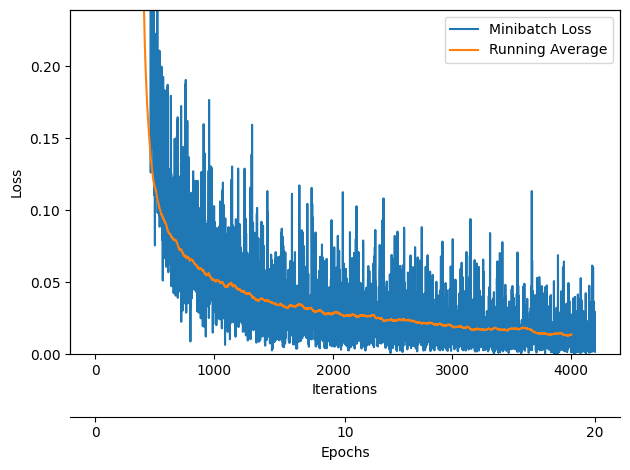

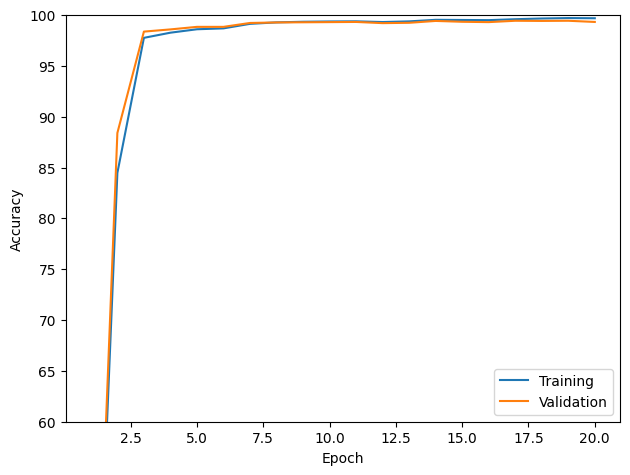

In [ ]:
model = AlexNet(num_classes=10)

model = model.to(DEVICE)


optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    scheduler_on='valid_acc',
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

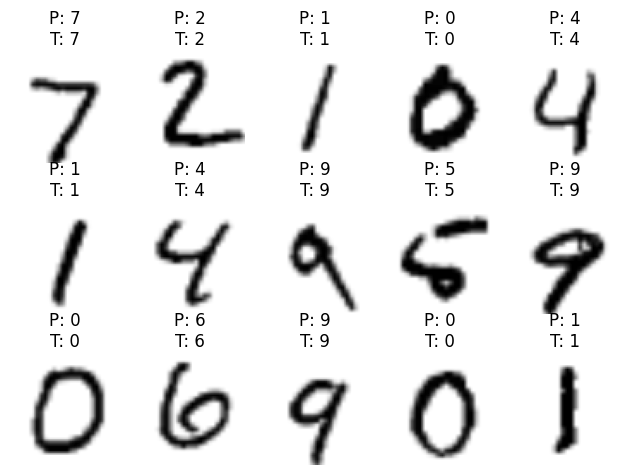

In [ ]:
model.cpu()
unnormalizer = UnNormalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
class_dict = {0: '0',
              1: '1',
              2: '2',
              3: '3',
              4: '4',
              5: '5',
              6: '6',
              7: '7',
              8: '8',
              9: '9'}

show_examples(model=model, data_loader=test_loader, unnormalizer=unnormalizer, class_dict=class_dict)

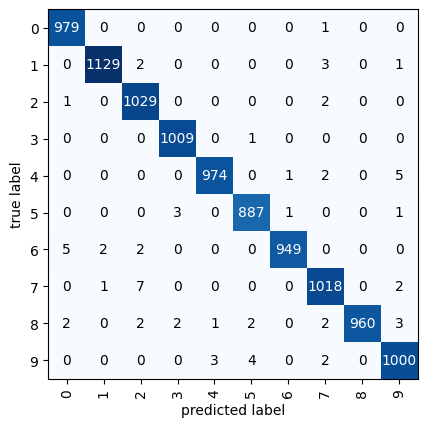

In [ ]:

mat = compute_confusion_matrix(model=model, data_loader=test_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=class_dict.values())
plt.show()



In [ ]:
imgs, labels = next(iter(test_loader))


# Set the model to evaluation mode and move it to the same device as the input tensor

model.to(DEVICE)

# Move the input tensor to the same device as the model
imgs = imgs.to(DEVICE)

# Calculate the predictions using the model on the test data
predictions = model(imgs)

# For each row determine the columns with the highest score, the prediction
predicted_classes = torch.argmax(predictions, dim=1)

# Convert the lists to tensors and move them to the CPU for calculation
predicted_classes = predicted_classes.cpu()
labels = labels.cpu()



Accuracy

Total Accuracy: 1.0000


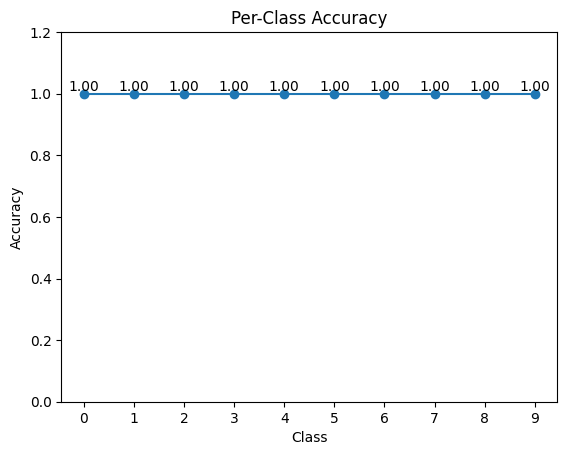

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have mnist_test_28 for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the accuracy for each class using the Accuracy metric from torchmetrics
class_accuracy_metric = torchmetrics.Accuracy(task='multiclass',num_classes=10, average=None)
class_accuracy_metric(predicted_classes, labels)
class_accuracy = class_accuracy_metric.compute()

# Calculate the total accuracy
total_accuracy = (predicted_classes == labels).float().mean().item()

print(f"Total Accuracy: {total_accuracy:.4f}")

# Plotting~ the per-class accuracy
class_indices = range(10)

plt.plot(class_indices, class_accuracy, marker='o')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_accuracy):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Precision

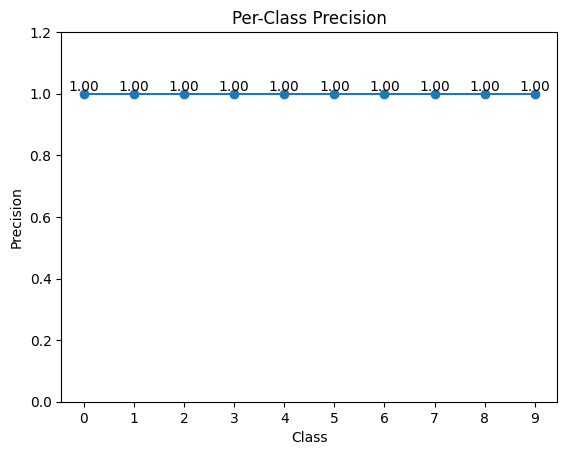

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have test_loader for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the precision for each class using the Precision metric from torchmetrics
class_precision_metric = torchmetrics.Precision(task='multiclass',num_classes=10, average=None)
class_precision_metric(predicted_classes, labels)
class_precision = class_precision_metric.compute()

# Plot the per-class precision
class_indices = range(10)
plt.plot(class_indices, class_precision, marker='o')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Per-Class Precision')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_precision):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Recall

<ipython-input-26-33187ac5e647>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_recall_metric(torch.tensor(predicted_classes), torch.tensor(labels))


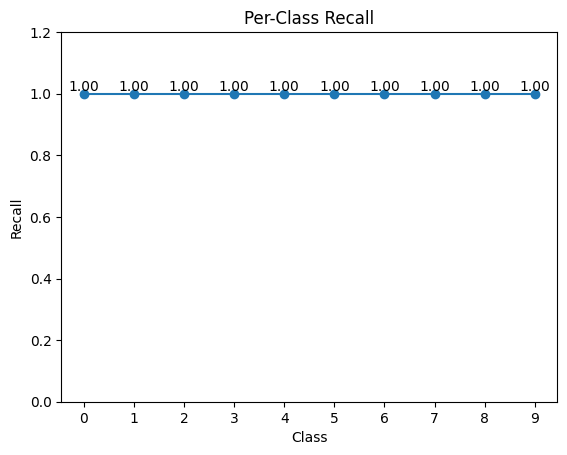

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have test_loader for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the recall for each class using the Recall metric from torchmetrics
class_recall_metric = torchmetrics.Recall(task='multiclass', num_classes=10, average=None)
class_recall_metric(torch.tensor(predicted_classes), torch.tensor(labels))
class_recall = class_recall_metric.compute()

# Plot the per-class recall
class_indices = range(10)
plt.plot(class_indices, class_recall, marker='o')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Per-Class Recall')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_recall):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


25%

In [15]:
class AlexNet(torch.nn.Module):

    def __init__(self, num_classes):
        super().__init__()
        self.features = torch.nn.Sequential(
            torch.nn.Conv2d(1, 64, kernel_size=11, stride=4, padding=2),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(64, 192, kernel_size=5, padding=2),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(192, 384, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 256, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(256, 256, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = torch.nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = torch.nn.Sequential(
            torch.nn.Dropout(0.25),
            torch.nn.Linear(256 * 6 * 6, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(0.25),
            torch.nn.Linear(4096, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        logits = self.classifier(x)
        return logits


Epoch: 001/020 | Batch 0000/0210 | Loss: 2.3020
Epoch: 001/020 | Batch 0100/0210 | Loss: 2.2949
Epoch: 001/020 | Batch 0200/0210 | Loss: 2.1296
Epoch: 001/020 | Train: 12.65% | Validation: 11.68%
Time elapsed: 1.60 min
Epoch: 002/020 | Batch 0000/0210 | Loss: 2.2553
Epoch: 002/020 | Batch 0100/0210 | Loss: 0.8498
Epoch: 002/020 | Batch 0200/0210 | Loss: 0.1103
Epoch: 002/020 | Train: 94.77% | Validation: 95.98%
Time elapsed: 3.21 min
Epoch: 003/020 | Batch 0000/0210 | Loss: 0.2108
Epoch: 003/020 | Batch 0100/0210 | Loss: 0.1040
Epoch: 003/020 | Batch 0200/0210 | Loss: 0.0727
Epoch: 003/020 | Train: 98.01% | Validation: 98.42%
Time elapsed: 4.79 min
Epoch: 004/020 | Batch 0000/0210 | Loss: 0.0617
Epoch: 004/020 | Batch 0100/0210 | Loss: 0.0912
Epoch: 004/020 | Batch 0200/0210 | Loss: 0.0256
Epoch: 004/020 | Train: 98.14% | Validation: 98.40%
Time elapsed: 6.41 min
Epoch: 005/020 | Batch 0000/0210 | Loss: 0.0411
Epoch: 005/020 | Batch 0100/0210 | Loss: 0.0473
Epoch: 005/020 | Batch 0200/

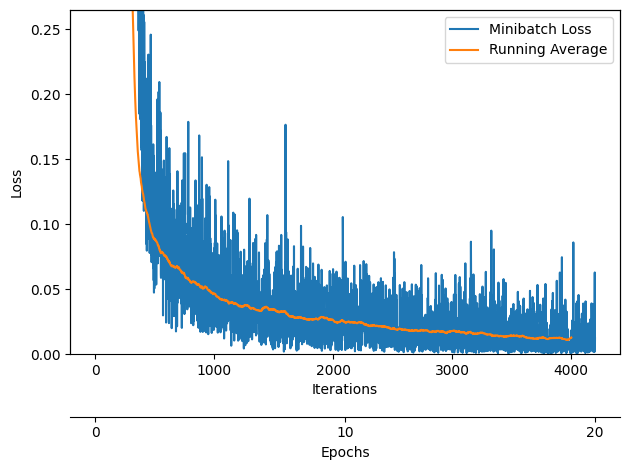

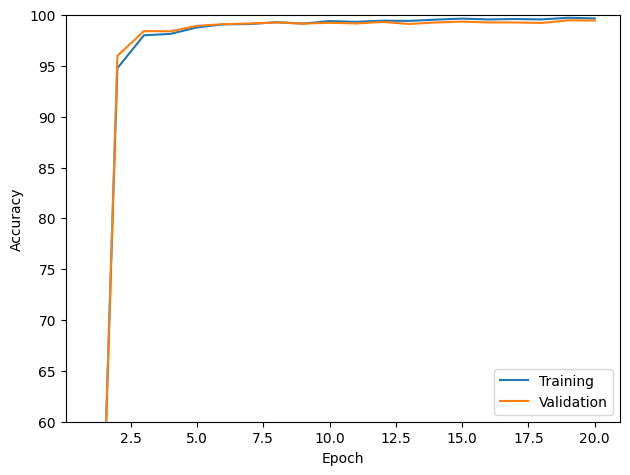

In [16]:
model = AlexNet(num_classes=10)

model = model.to(DEVICE)


optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    scheduler_on='valid_acc',
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

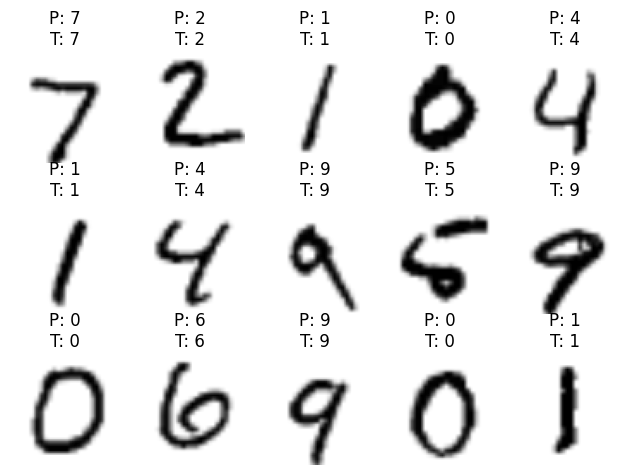

In [17]:
model.cpu()
unnormalizer = UnNormalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
class_dict = {0: '0',
              1: '1',
              2: '2',
              3: '3',
              4: '4',
              5: '5',
              6: '6',
              7: '7',
              8: '8',
              9: '9'}

show_examples(model=model, data_loader=test_loader, unnormalizer=unnormalizer, class_dict=class_dict)

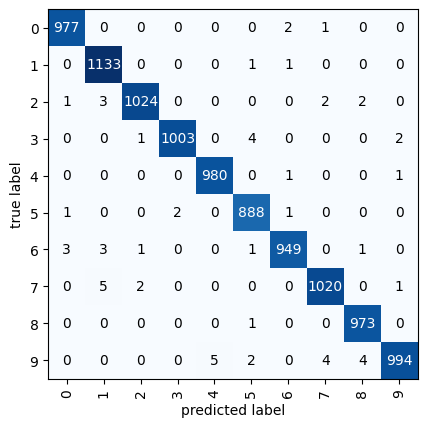

In [18]:

mat = compute_confusion_matrix(model=model, data_loader=test_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=class_dict.values())
plt.show()



In [19]:
imgs, labels = next(iter(test_loader))


# Set the model to evaluation mode and move it to the same device as the input tensor

model.to(DEVICE)

# Move the input tensor to the same device as the model
imgs = imgs.to(DEVICE)

# Calculate the predictions using the model on the test data
predictions = model(imgs)

# For each row determine the columns with the highest score, the prediction
predicted_classes = torch.argmax(predictions, dim=1)

# Convert the lists to tensors and move them to the CPU for calculation
predicted_classes = predicted_classes.cpu()
labels = labels.cpu()



Accuracy

Total Accuracy: 1.0000


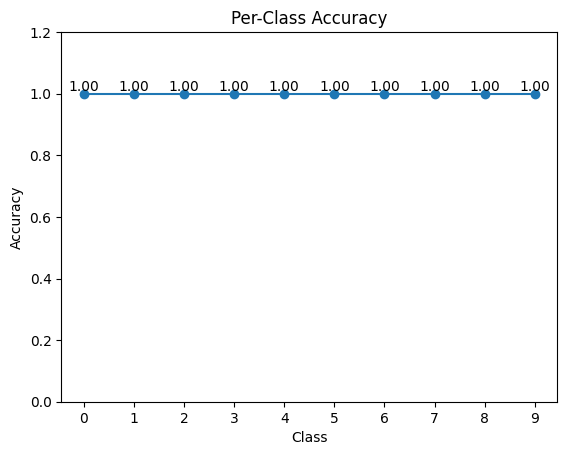

In [20]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have mnist_test_28 for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the accuracy for each class using the Accuracy metric from torchmetrics
class_accuracy_metric = torchmetrics.Accuracy(task='multiclass',num_classes=10, average=None)
class_accuracy_metric(predicted_classes, labels)
class_accuracy = class_accuracy_metric.compute()

# Calculate the total accuracy
total_accuracy = (predicted_classes == labels).float().mean().item()

print(f"Total Accuracy: {total_accuracy:.4f}")

# Plotting~ the per-class accuracy
class_indices = range(10)

plt.plot(class_indices, class_accuracy, marker='o')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_accuracy):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Precision

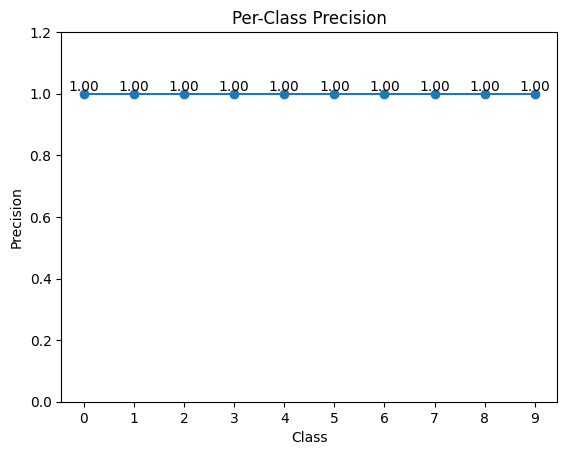

In [21]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have test_loader for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the precision for each class using the Precision metric from torchmetrics
class_precision_metric = torchmetrics.Precision(task='multiclass',num_classes=10, average=None)
class_precision_metric(predicted_classes, labels)
class_precision = class_precision_metric.compute()

# Plot the per-class precision
class_indices = range(10)
plt.plot(class_indices, class_precision, marker='o')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Per-Class Precision')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_precision):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Recall

<ipython-input-22-33187ac5e647>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_recall_metric(torch.tensor(predicted_classes), torch.tensor(labels))


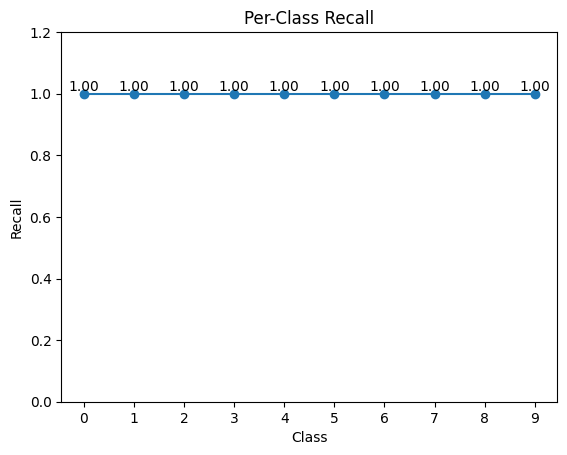

In [22]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have test_loader for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the recall for each class using the Recall metric from torchmetrics
class_recall_metric = torchmetrics.Recall(task='multiclass', num_classes=10, average=None)
class_recall_metric(torch.tensor(predicted_classes), torch.tensor(labels))
class_recall = class_recall_metric.compute()

# Plot the per-class recall
class_indices = range(10)
plt.plot(class_indices, class_recall, marker='o')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Per-Class Recall')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_recall):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


0%

In [ ]:
class AlexNet(torch.nn.Module):

    def __init__(self, num_classes):
        super().__init__()
        self.features = torch.nn.Sequential(
            torch.nn.Conv2d(1, 64, kernel_size=11, stride=4, padding=2),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(64, 192, kernel_size=5, padding=2),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(192, 384, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 256, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(256, 256, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = torch.nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = torch.nn.Sequential(
            torch.nn.Dropout(0.0),
            torch.nn.Linear(256 * 6 * 6, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(0.0),
            torch.nn.Linear(4096, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        logits = self.classifier(x)
        return logits


Epoch: 001/020 | Batch 0000/0210 | Loss: 2.3031
Epoch: 001/020 | Batch 0100/0210 | Loss: 2.2954
Epoch: 001/020 | Batch 0200/0210 | Loss: 2.3902
Epoch: 001/020 | Train: 11.34% | Validation: 10.50%
Time elapsed: 1.58 min
Epoch: 002/020 | Batch 0000/0210 | Loss: 2.3150
Epoch: 002/020 | Batch 0100/0210 | Loss: 2.2279
Epoch: 002/020 | Batch 0200/0210 | Loss: 2.3238
Epoch: 002/020 | Train: 18.10% | Validation: 17.98%
Time elapsed: 3.19 min
Epoch: 003/020 | Batch 0000/0210 | Loss: 2.1233
Epoch: 003/020 | Batch 0100/0210 | Loss: 1.3716
Epoch: 003/020 | Batch 0200/0210 | Loss: 0.5932
Epoch: 003/020 | Train: 78.46% | Validation: 81.47%
Time elapsed: 4.78 min
Epoch: 004/020 | Batch 0000/0210 | Loss: 0.6666
Epoch: 004/020 | Batch 0100/0210 | Loss: 0.2111
Epoch: 004/020 | Batch 0200/0210 | Loss: 0.0960
Epoch: 004/020 | Train: 96.41% | Validation: 97.73%
Time elapsed: 6.38 min
Epoch: 005/020 | Batch 0000/0210 | Loss: 0.0677
Epoch: 005/020 | Batch 0100/0210 | Loss: 0.0574
Epoch: 005/020 | Batch 0200/

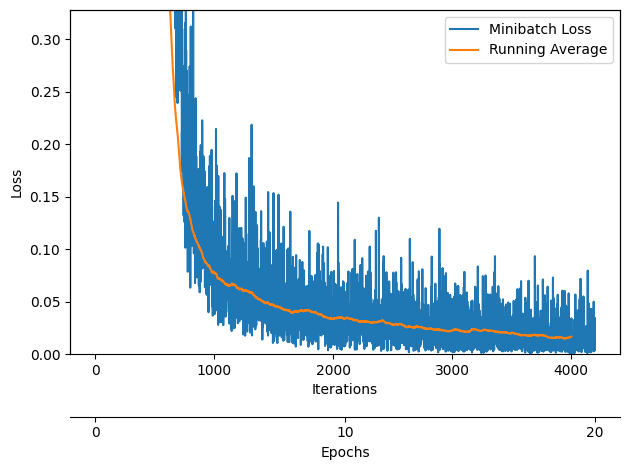

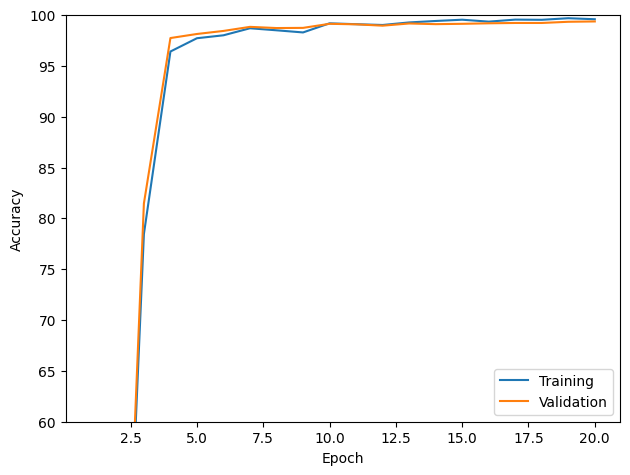

In [ ]:
model = AlexNet(num_classes=10)

model = model.to(DEVICE)


optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    scheduler_on='valid_acc',
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

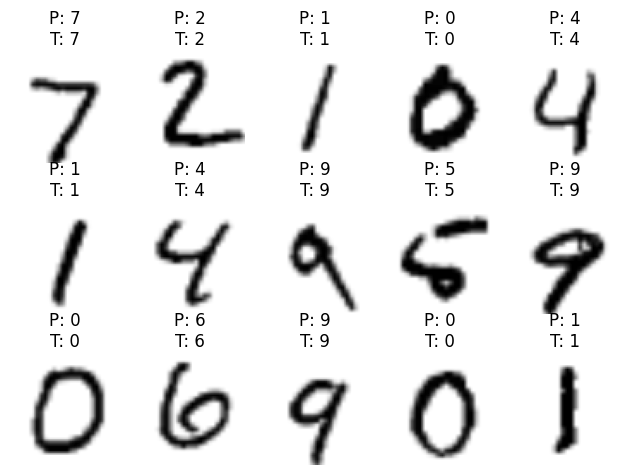

In [ ]:
model.cpu()
unnormalizer = UnNormalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
class_dict = {0: '0',
              1: '1',
              2: '2',
              3: '3',
              4: '4',
              5: '5',
              6: '6',
              7: '7',
              8: '8',
              9: '9'}

show_examples(model=model, data_loader=test_loader, unnormalizer=unnormalizer, class_dict=class_dict)

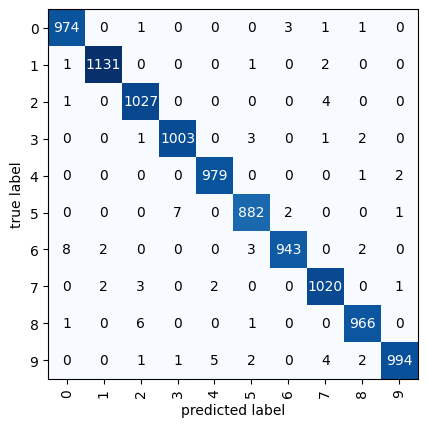

In [ ]:

mat = compute_confusion_matrix(model=model, data_loader=test_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=class_dict.values())
plt.show()



In [ ]:
imgs, labels = next(iter(test_loader))


# Set the model to evaluation mode and move it to the same device as the input tensor

model.to(DEVICE)

# Move the input tensor to the same device as the model
imgs = imgs.to(DEVICE)

# Calculate the predictions using the model on the test data
predictions = model(imgs)

# For each row determine the columns with the highest score, the prediction
predicted_classes = torch.argmax(predictions, dim=1)

# Convert the lists to tensors and move them to the CPU for calculation
predicted_classes = predicted_classes.cpu()
labels = labels.cpu()



Accuracy

Total Accuracy: 0.9961


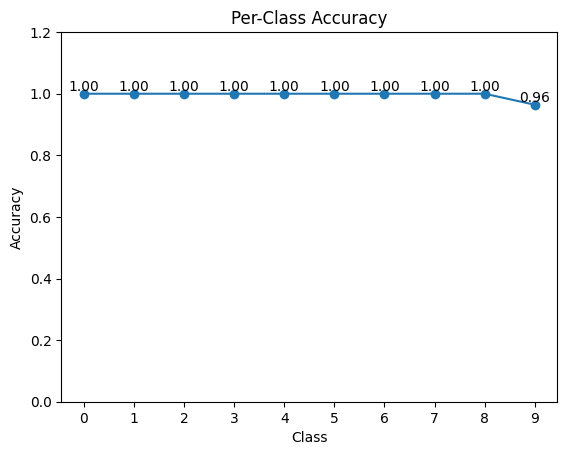

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have mnist_test_28 for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the accuracy for each class using the Accuracy metric from torchmetrics
class_accuracy_metric = torchmetrics.Accuracy(task='multiclass',num_classes=10, average=None)
class_accuracy_metric(predicted_classes, labels)
class_accuracy = class_accuracy_metric.compute()

# Calculate the total accuracy
total_accuracy = (predicted_classes == labels).float().mean().item()

print(f"Total Accuracy: {total_accuracy:.4f}")

# Plotting~ the per-class accuracy
class_indices = range(10)

plt.plot(class_indices, class_accuracy, marker='o')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_accuracy):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Precision

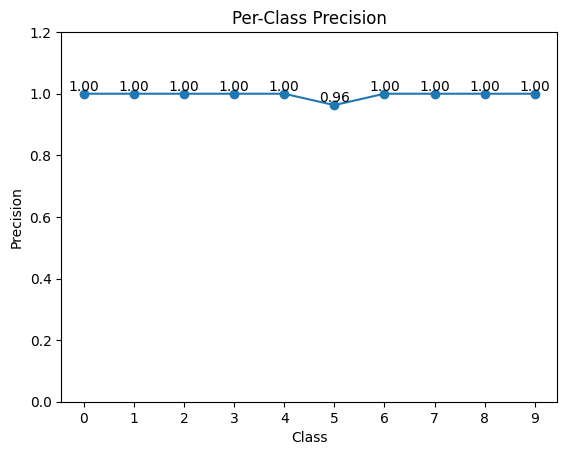

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have test_loader for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the precision for each class using the Precision metric from torchmetrics
class_precision_metric = torchmetrics.Precision(task='multiclass',num_classes=10, average=None)
class_precision_metric(predicted_classes, labels)
class_precision = class_precision_metric.compute()

# Plot the per-class precision
class_indices = range(10)
plt.plot(class_indices, class_precision, marker='o')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Per-Class Precision')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_precision):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Recall

<ipython-input-42-33187ac5e647>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_recall_metric(torch.tensor(predicted_classes), torch.tensor(labels))


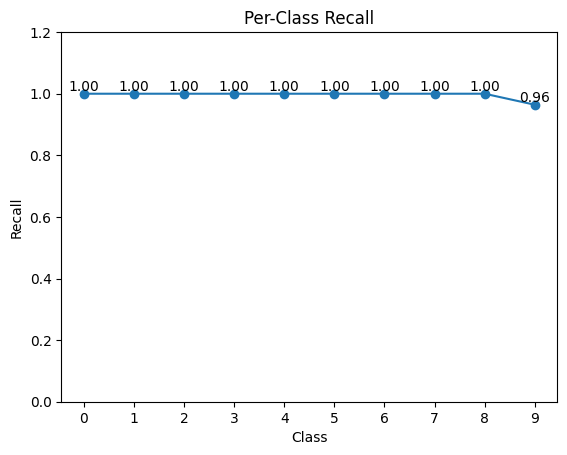

In [ ]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have test_loader for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the recall for each class using the Recall metric from torchmetrics
class_recall_metric = torchmetrics.Recall(task='multiclass', num_classes=10, average=None)
class_recall_metric(torch.tensor(predicted_classes), torch.tensor(labels))
class_recall = class_recall_metric.compute()

# Plot the per-class recall
class_indices = range(10)
plt.plot(class_indices, class_recall, marker='o')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Per-Class Recall')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_recall):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Optimal AlexNet without changes in kernel, stride, hidden layers and dropout 0.5 and data augmentation

In [23]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from helper_evaluation import set_all_seeds, set_deterministic, compute_confusion_matrix
from helper_train import train_model
from helper_plotting import plot_training_loss, plot_accuracy, show_examples, plot_confusion_matrix
from helper_dataset import get_dataloaders_mnist, UnNormalize


In [25]:
RANDOM_SEED = 123
BATCH_SIZE = 256
NUM_EPOCHS = 20
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
set_all_seeds(RANDOM_SEED)
#set_deterministic()

In [26]:
import torchvision.transforms as transforms
import torch.utils.data

train_transforms = transforms.Compose([
    transforms.Resize((70, 70)),
    transforms.RandomCrop((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Grayscale images have only one channel, so use a single value for mean and std.
])

train_data_augmentation_transforms = transforms.Compose([
    transforms.Resize((70, 70)),
    transforms.RandomCrop((64, 64)),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Grayscale images have only one channel, so use a single value for mean and std.
])

test_transforms = transforms.Compose([
    transforms.Resize((70, 70)),
    transforms.CenterCrop((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])



# Assuming you have a function named get_dataloaders_mnist that loads the MNIST dataset.
train_loader_original, valid_loader, test_loader = get_dataloaders_mnist(
    batch_size=BATCH_SIZE,
    validation_fraction=0.1,
    train_transforms=train_transforms,
    test_transforms=test_transforms,
    num_workers=2
)

# Load the augmented dataset with data augmentation transformations
train_augmented, _, _ = get_dataloaders_mnist(
    batch_size=128,
    validation_fraction=0.1,
    train_transforms=train_data_augmentation_transforms,
    test_transforms=test_transforms,
    num_workers=2
)

# Concatenate the original and augmented datasets into a single dataset
combined_dataset = torch.utils.data.ConcatDataset([train_loader_original.dataset, train_augmented.dataset])

# Create a new DataLoader with the combined dataset
train_loader = torch.utils.data.DataLoader(
    dataset=combined_dataset,
    batch_size=BATCH_SIZE,
    num_workers=2,
    shuffle=True  # Shuffle the data during training
)

# Checking the dataset size
print(f"Training dataset size: {len(train_loader.dataset)}")
print(f"Testing dataset size: {len(test_loader.dataset)}")




Training dataset size: 120000
Testing dataset size: 10000


In [35]:
class AlexNet(torch.nn.Module):

    def __init__(self, num_classes):
        super().__init__()
        self.features = torch.nn.Sequential(
            torch.nn.Conv2d(1, 64, kernel_size=11, stride=4, padding=2),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(64, 192, kernel_size=5, padding=2),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(192, 384, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(384, 256, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv2d(256, 256, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = torch.nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = torch.nn.Sequential(
            torch.nn.Dropout(0.5),
            torch.nn.Linear(256 * 6 * 6, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(4096, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        logits = self.classifier(x)
        return logits


Epoch: 001/020 | Batch 0000/0469 | Loss: 2.3027
Epoch: 001/020 | Batch 0100/0469 | Loss: 2.2998
Epoch: 001/020 | Batch 0200/0469 | Loss: 2.2771
Epoch: 001/020 | Batch 0300/0469 | Loss: 2.1212
Epoch: 001/020 | Batch 0400/0469 | Loss: 1.4429
Epoch: 001/020 | Train: 81.95% | Validation: 85.47%
Time elapsed: 2.04 min
Epoch: 002/020 | Batch 0000/0469 | Loss: 0.5832
Epoch: 002/020 | Batch 0100/0469 | Loss: 0.1645
Epoch: 002/020 | Batch 0200/0469 | Loss: 0.1640
Epoch: 002/020 | Batch 0300/0469 | Loss: 0.0872
Epoch: 002/020 | Batch 0400/0469 | Loss: 0.1447
Epoch: 002/020 | Train: 96.99% | Validation: 98.03%
Time elapsed: 3.82 min
Epoch: 003/020 | Batch 0000/0469 | Loss: 0.1287
Epoch: 003/020 | Batch 0100/0469 | Loss: 0.0379
Epoch: 003/020 | Batch 0200/0469 | Loss: 0.0536
Epoch: 003/020 | Batch 0300/0469 | Loss: 0.0407
Epoch: 003/020 | Batch 0400/0469 | Loss: 0.0757
Epoch: 003/020 | Train: 98.72% | Validation: 99.25%
Time elapsed: 5.60 min
Epoch: 004/020 | Batch 0000/0469 | Loss: 0.0661
Epoch: 

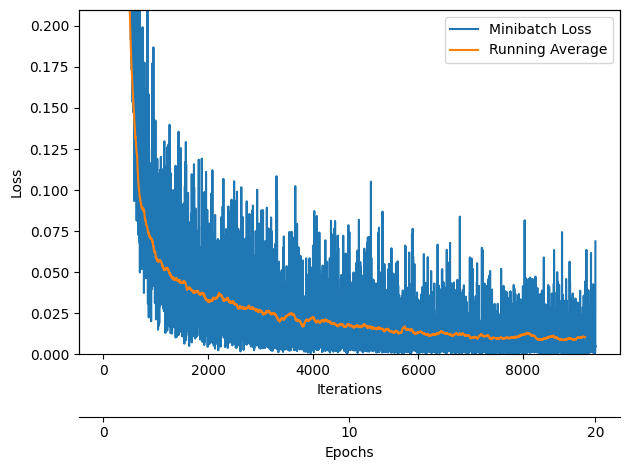

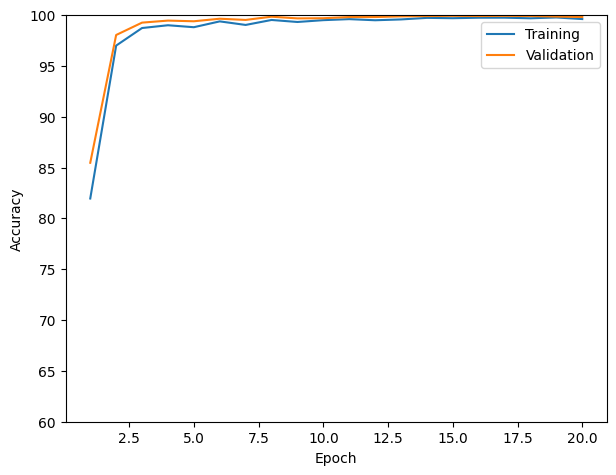

In [36]:
model = AlexNet(num_classes=10)

model = model.to(DEVICE)


optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    scheduler_on='valid_acc',
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

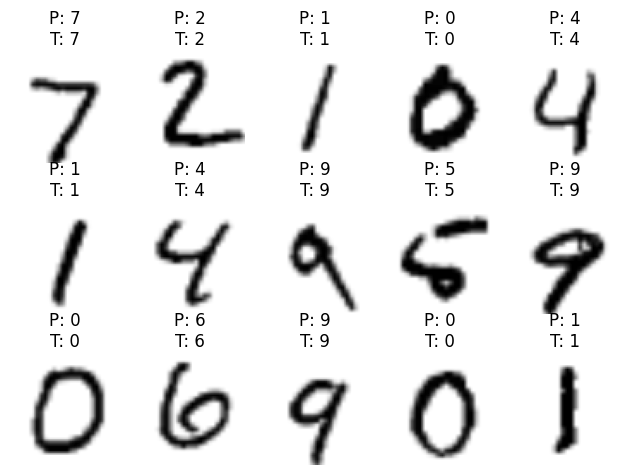

In [37]:
model.cpu()
unnormalizer = UnNormalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
class_dict = {0: '0',
              1: '1',
              2: '2',
              3: '3',
              4: '4',
              5: '5',
              6: '6',
              7: '7',
              8: '8',
              9: '9'}

show_examples(model=model, data_loader=test_loader, unnormalizer=unnormalizer, class_dict=class_dict)

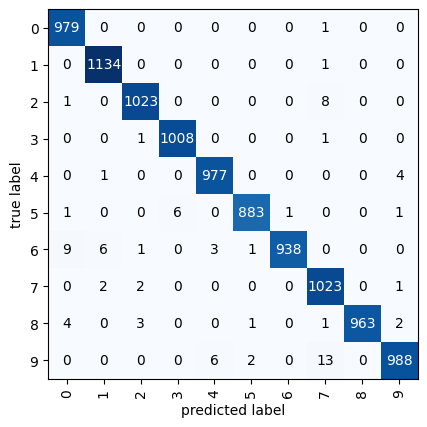

In [38]:

mat = compute_confusion_matrix(model=model, data_loader=test_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=class_dict.values())
plt.show()



In [39]:
imgs, labels = next(iter(test_loader))


# Set the model to evaluation mode and move it to the same device as the input tensor

model.to(DEVICE)

# Move the input tensor to the same device as the model
imgs = imgs.to(DEVICE)

# Calculate the predictions using the model on the test data
predictions = model(imgs)

# For each row determine the columns with the highest score, the prediction
predicted_classes = torch.argmax(predictions, dim=1)

# Convert the lists to tensors and move them to the CPU for calculation
predicted_classes = predicted_classes.cpu()
labels = labels.cpu()



Accuracy

Total Accuracy: 1.0000


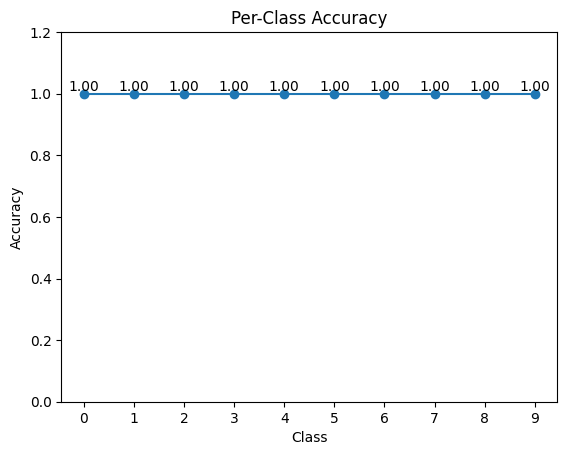

In [40]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have mnist_test_28 for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the accuracy for each class using the Accuracy metric from torchmetrics
class_accuracy_metric = torchmetrics.Accuracy(task='multiclass',num_classes=10, average=None)
class_accuracy_metric(predicted_classes, labels)
class_accuracy = class_accuracy_metric.compute()

# Calculate the total accuracy
total_accuracy = (predicted_classes == labels).float().mean().item()

print(f"Total Accuracy: {total_accuracy:.4f}")

# Plotting the per-class accuracy
class_indices = range(10)

plt.plot(class_indices, class_accuracy, marker='o')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_accuracy):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Precision

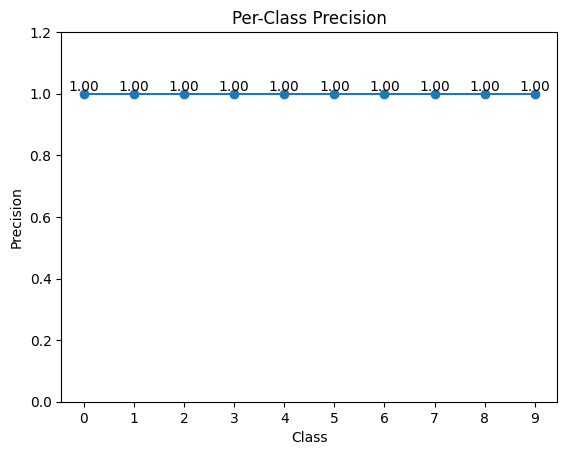

In [41]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have test_loader for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the precision for each class using the Precision metric from torchmetrics
class_precision_metric = torchmetrics.Precision(task='multiclass',num_classes=10, average=None)
class_precision_metric(predicted_classes, labels)
class_precision = class_precision_metric.compute()

# Plot the per-class precision
class_indices = range(10)
plt.plot(class_indices, class_precision, marker='o')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Per-Class Precision')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_precision):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


Recall

<ipython-input-42-33187ac5e647>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_recall_metric(torch.tensor(predicted_classes), torch.tensor(labels))


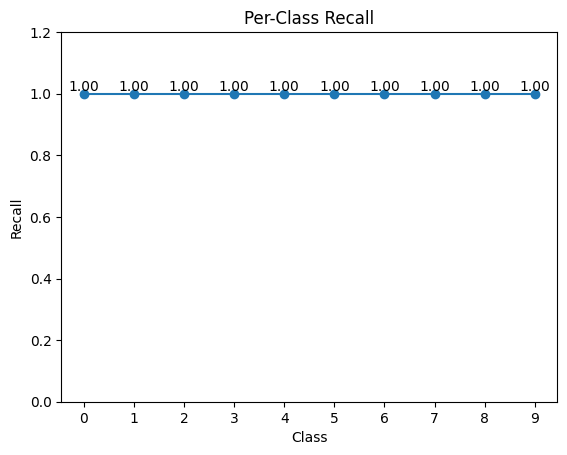

In [42]:
import torch
import torchmetrics
import matplotlib.pyplot as plt

# Assuming you have trained the model using the provided training code
# Assuming you have test_loader for the test dataset
# Assuming you have a function called get_dataloaders_mnist that loads the MNIST dataset


# Calculate the recall for each class using the Recall metric from torchmetrics
class_recall_metric = torchmetrics.Recall(task='multiclass', num_classes=10, average=None)
class_recall_metric(torch.tensor(predicted_classes), torch.tensor(labels))
class_recall = class_recall_metric.compute()

# Plot the per-class recall
class_indices = range(10)
plt.plot(class_indices, class_recall, marker='o')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Per-Class Recall')
plt.ylim(0, 1.2)
plt.xticks(class_indices)

# Add labels to each marker
for x, y in zip(class_indices, class_recall):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()


# References

This notebook is based on the books:

"Dive into deep learning" by Aston Zhang, Zack C. Lipton, Mu Li and Alex J. Smola.

"Neural Networks and Deep Learning" by Michael Nielsen.